*Data Source : UCI Machine Learning Repository*


**Context**

*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*


**Attributes Description:**


**Bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')


**Related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). 


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
import seaborn as sns
import sklearn
sklearn.__version__
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import joblib
from sklearn import tree

In [202]:
df = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [204]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [205]:
category = [var for var in df.columns if df[var].dtypes=='O']

print('There are {} categorical variables \n'.format(len(category)))
print('The categorical variables are: ', category)

There are 11 categorical variables 

The categorical variables are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [206]:
df[category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [207]:
for var in category:
    print(var,'contains', len(df[var].unique()),'labels ')

job contains 12 labels 
marital contains 4 labels 
education contains 8 labels 
default contains 3 labels 
housing contains 3 labels 
loan contains 3 labels 
contact contains 2 labels 
month contains 10 labels 
day_of_week contains 5 labels 
poutcome contains 3 labels 
y contains 2 labels 


# EDA
## Understanding the basics

### Univariate

#### Numerical Features

In [208]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 10 : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


There are 10 numerical features in the dataset

In [209]:
num_cols_skewness = df[num_cols].skew()

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

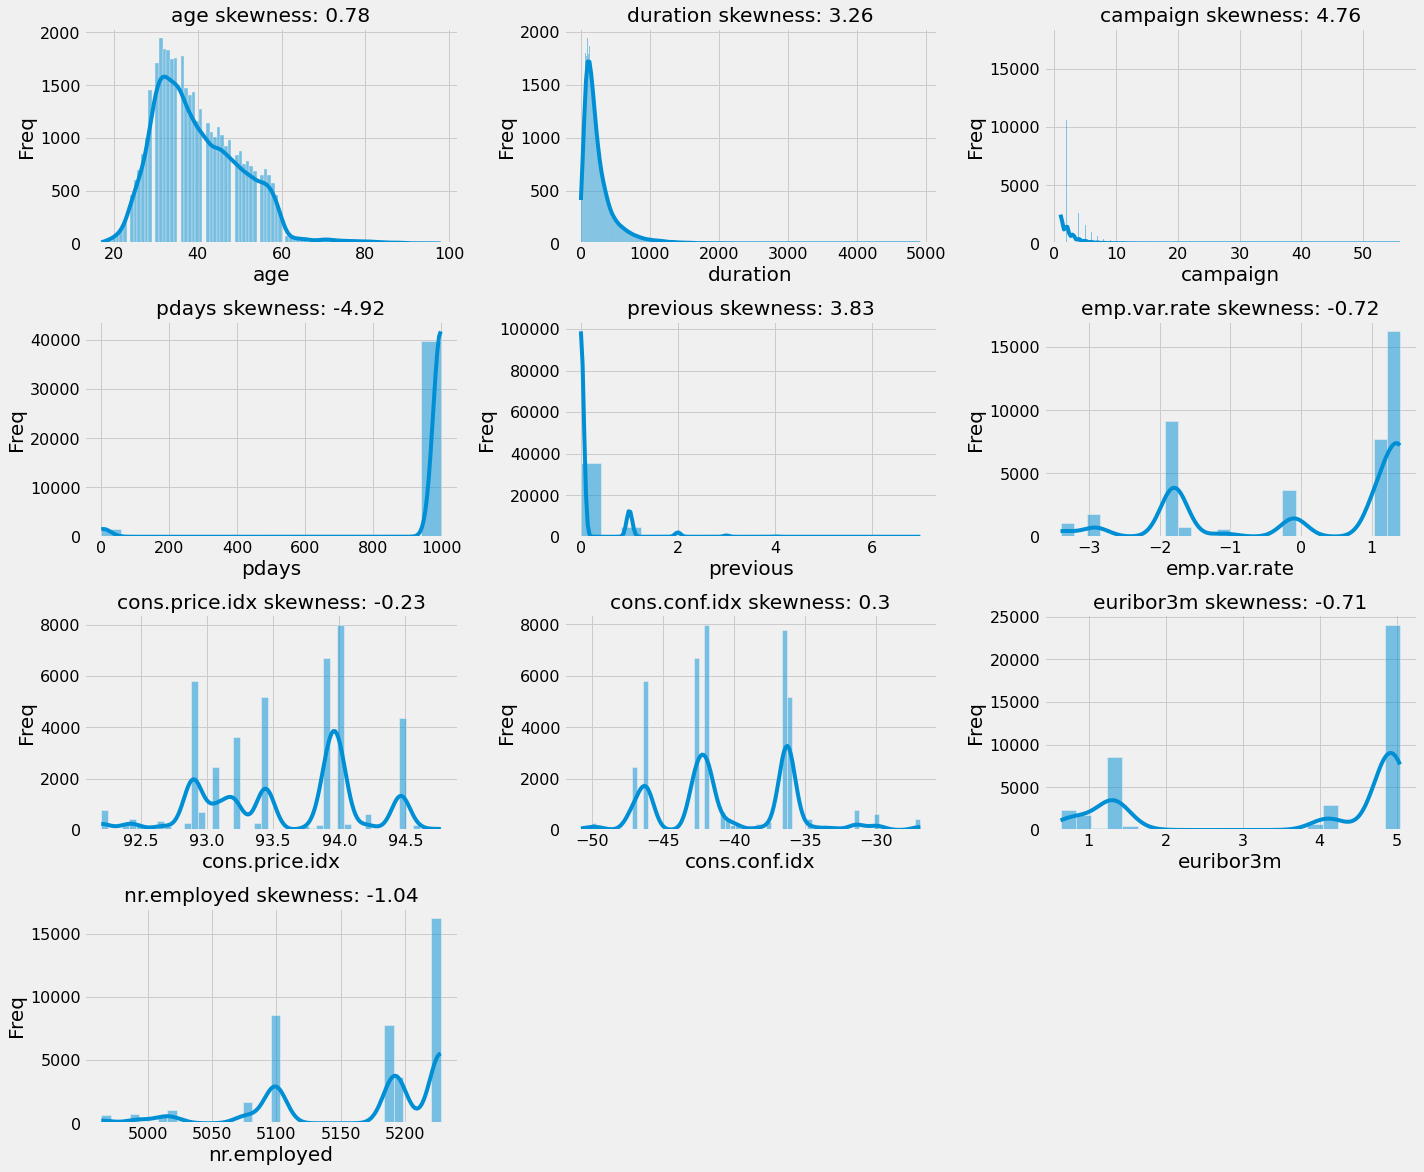

In [210]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.savefig('fig/eda/num histplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

**Skewness:**
- cons_price_idx (left skewed) and cons_conf_idx are approximately symmetric.
- age, euribor3m, emp_var_rate (left skewed), and nr_employed (left skewed) are moderately skewed.
- duration, campaign, previous, and pdays (left skewed) are highly skewed.

**Multimodal:**
Some of the numerical variables have mode more than 1. They are called multimodal. The following features are multimodal:
- emp_var_rate, cons_price_idx, cons_conf_idx, and nr_employed.

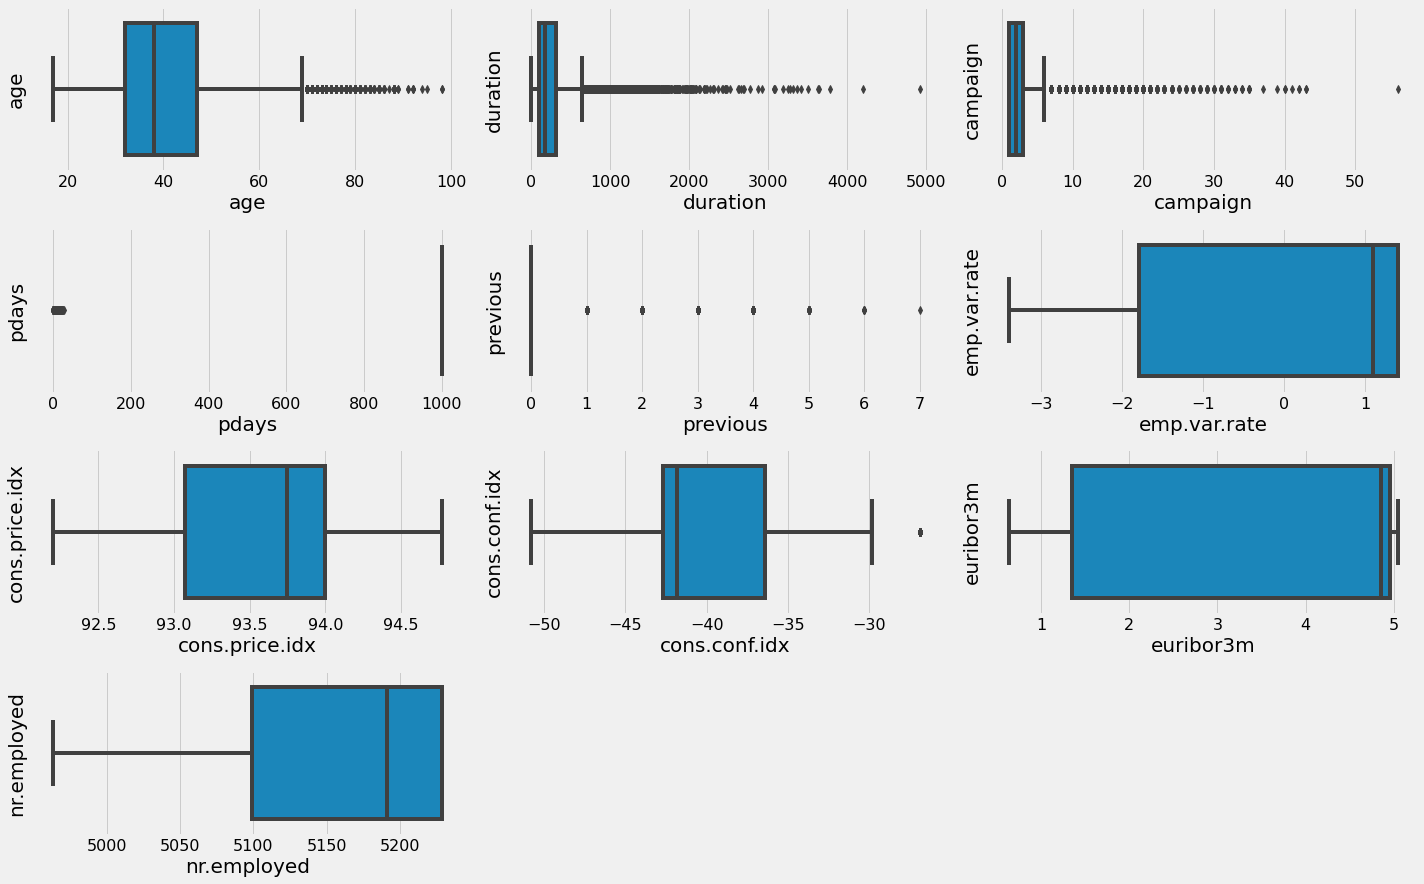

In [211]:
plt.figure(figsize=(20, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel(str(num_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('fig/eda/num boxplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

Features that contains outliers:

On the upper limits:
- age, duration, campaign, and previous.

Below the bottom limits:
- pdays

#### Bivariate

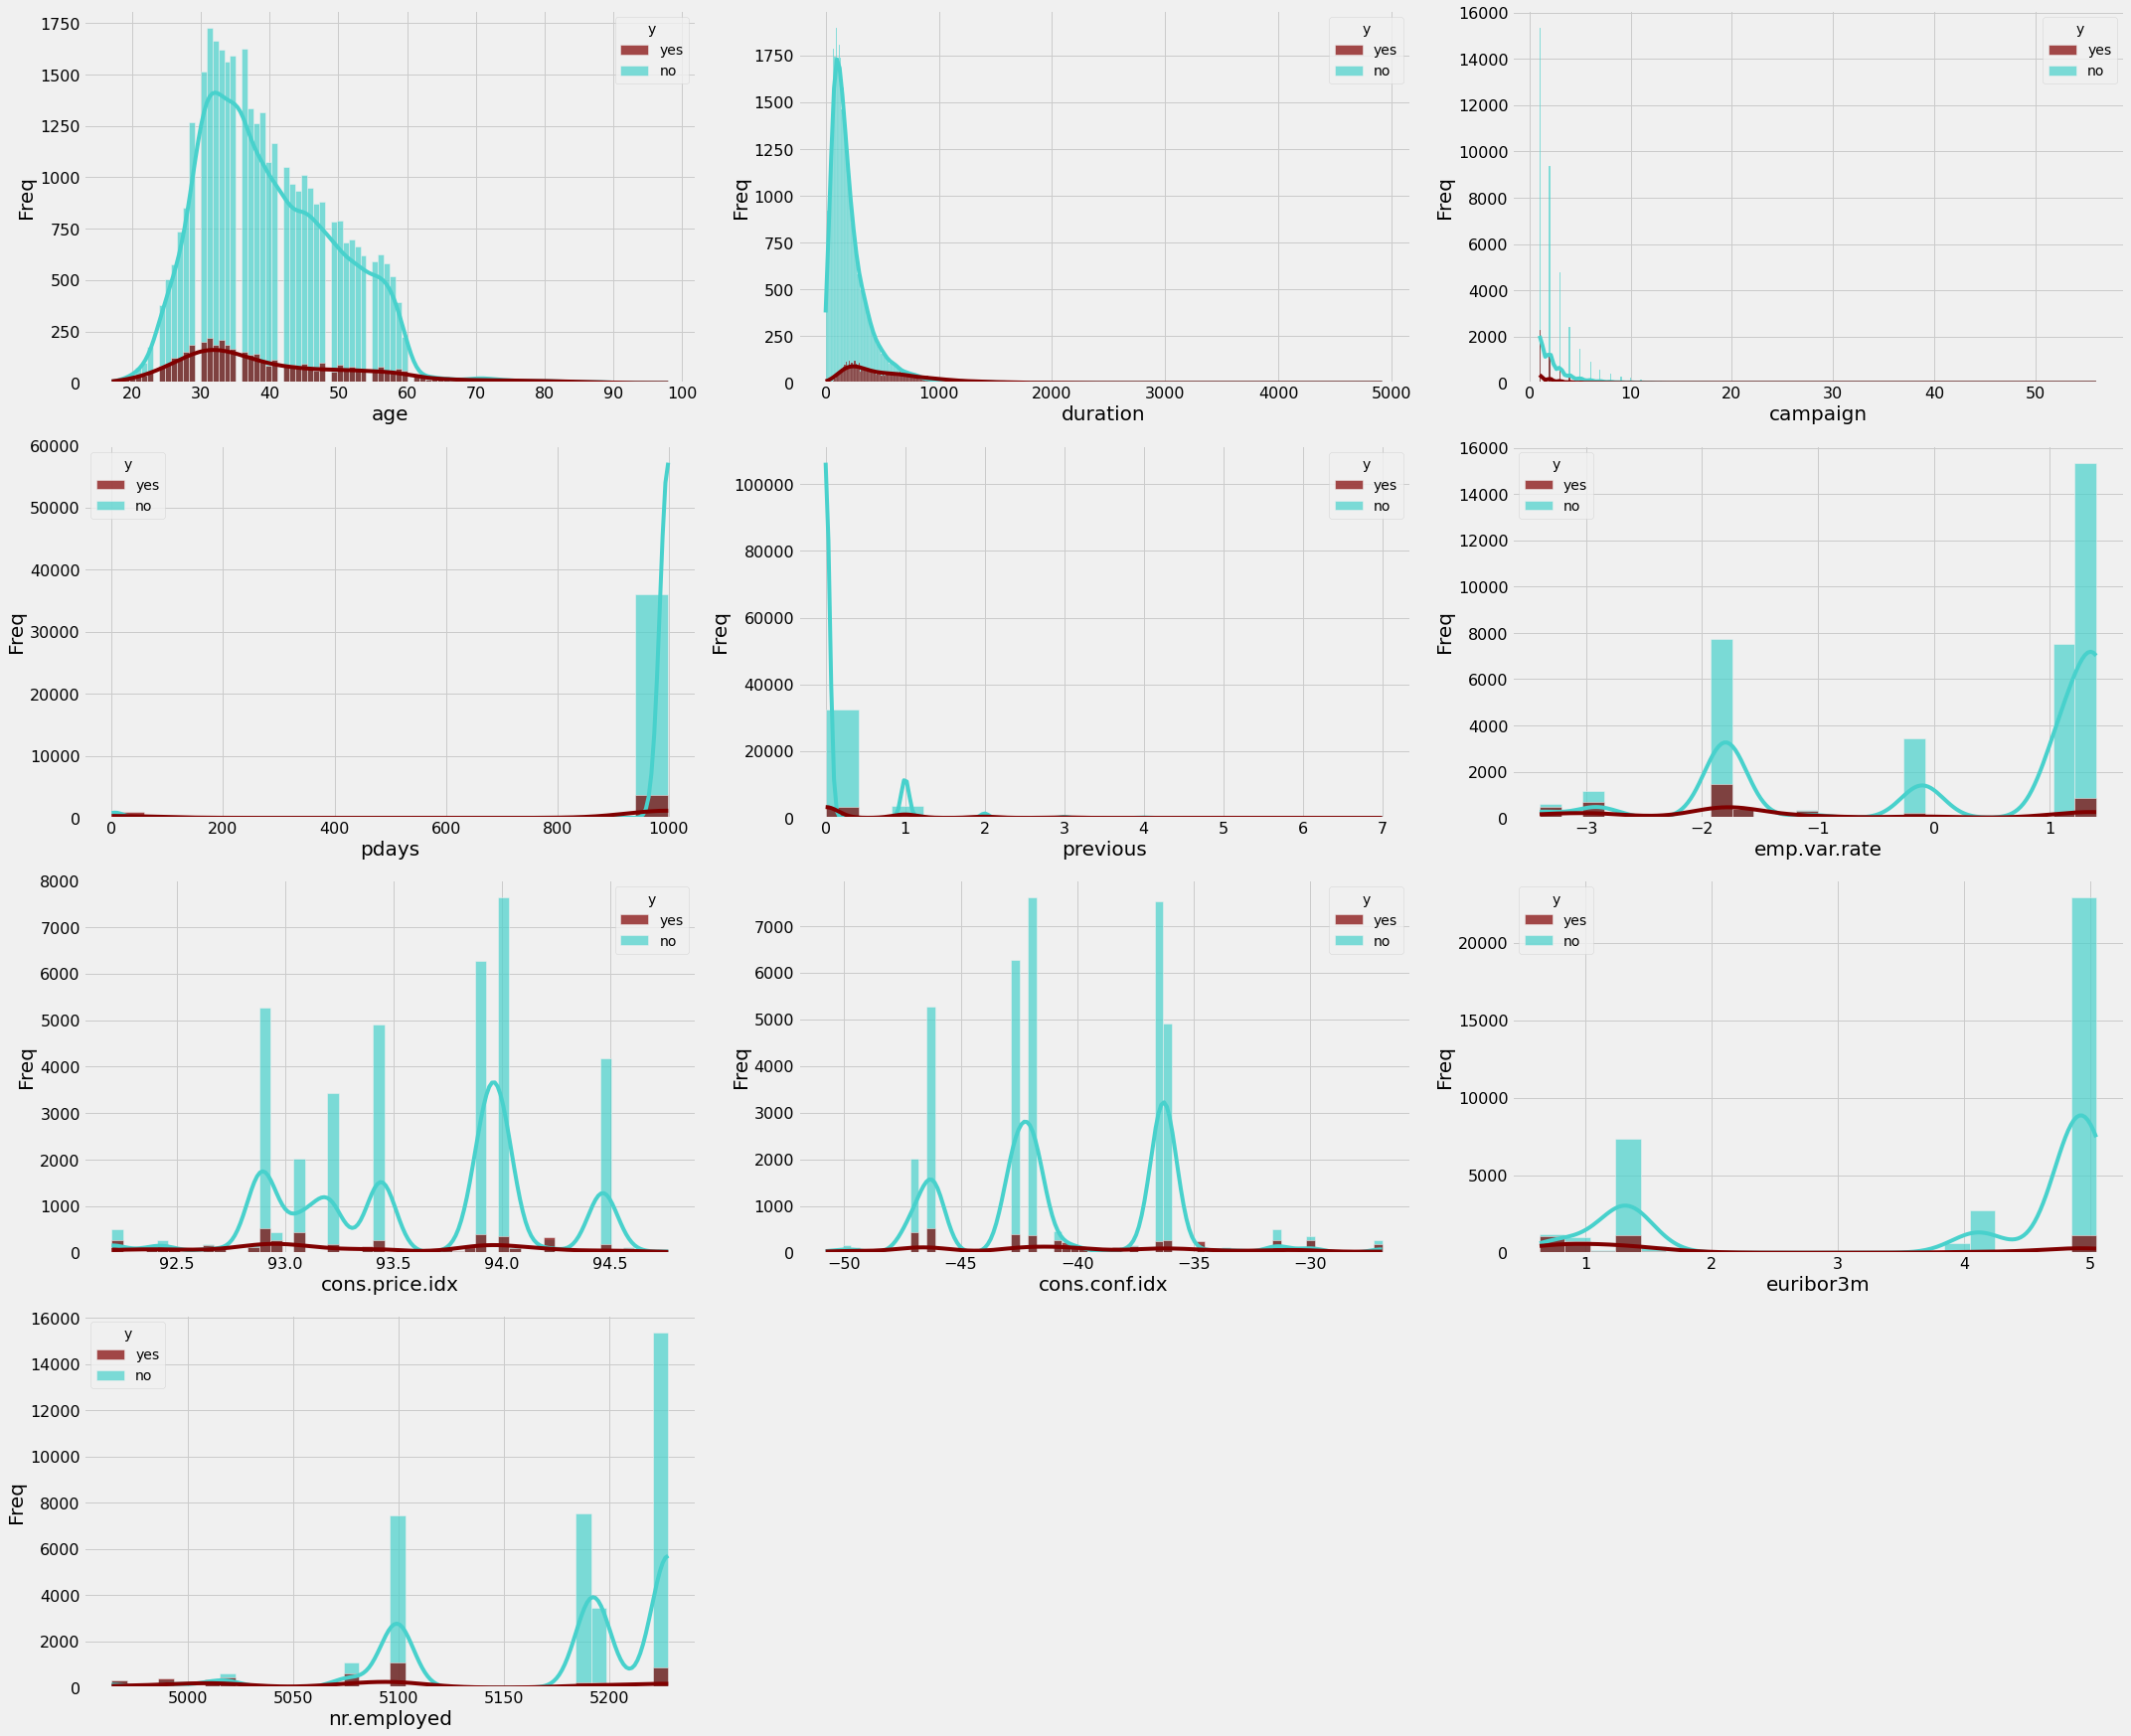

In [212]:
plt.figure(figsize=(30, 30))
plt.title('Numerical Features with Target')
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        x = df[num_cols[i]],
        kde = True,
        hue_order = ["yes", "no"],
        palette = {"yes":"maroon", "no":"mediumturquoise"},
        hue = df["y"],
        alpha = 0.7
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('fig/eda/num histplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

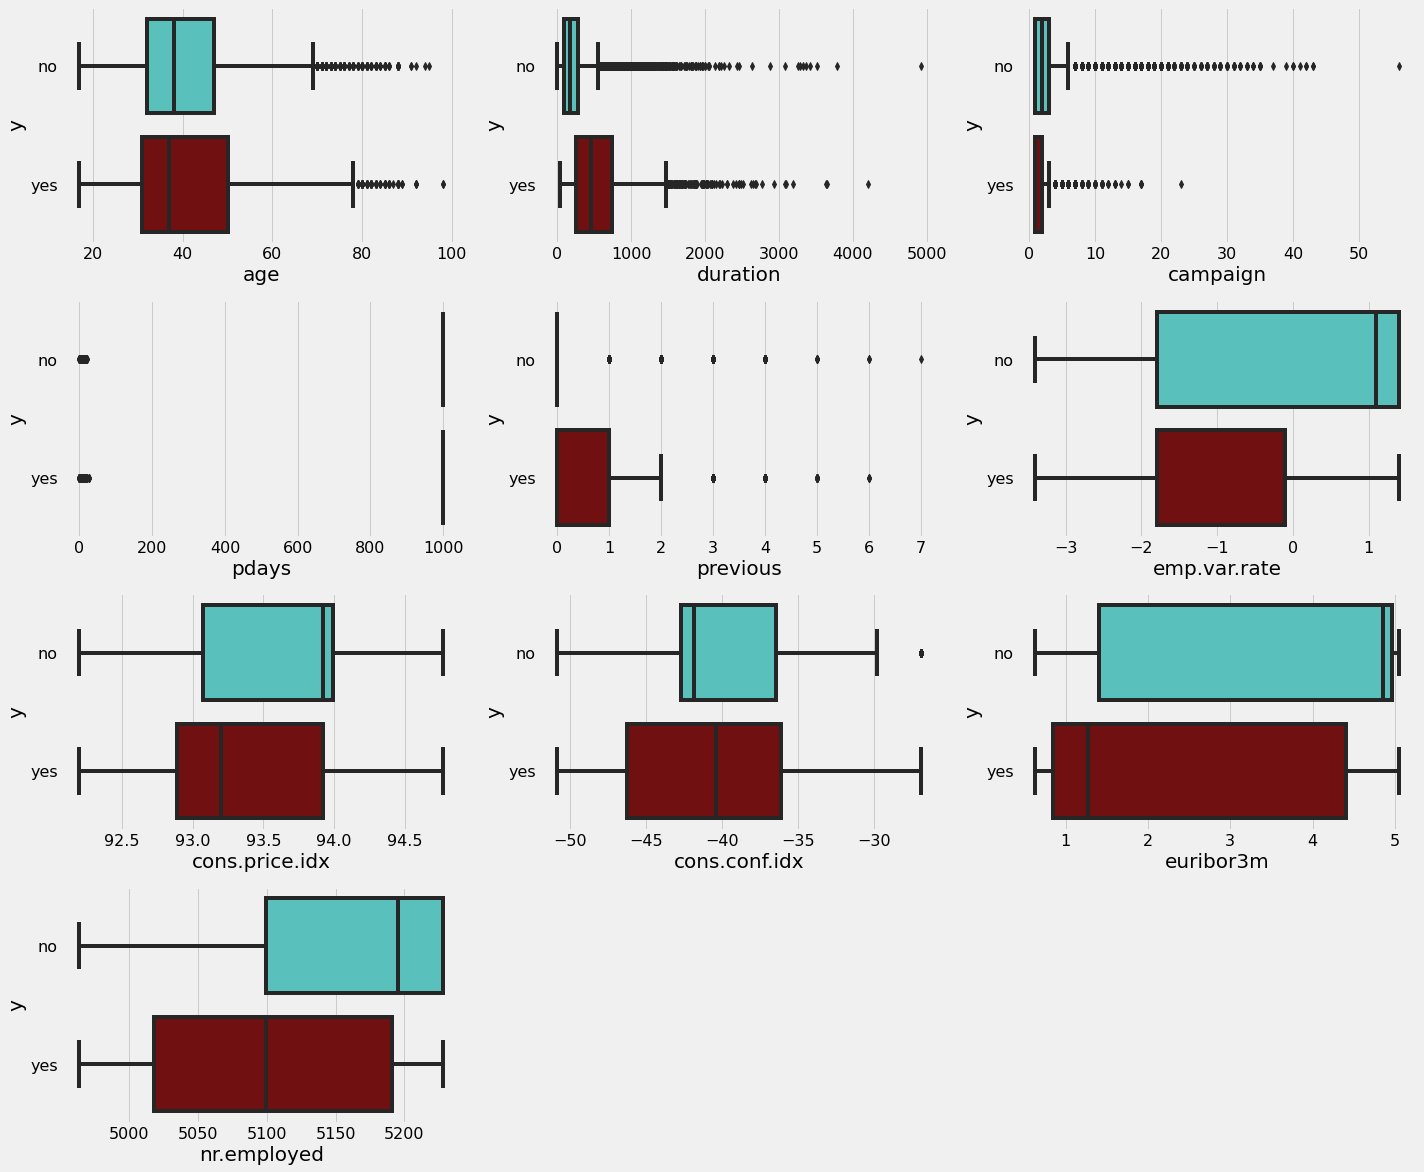

In [213]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]],
        y = df["y"],
        palette = {"yes":"maroon", "no":"mediumturquoise"},
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("y", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('fig/eda/num boxplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

In [214]:
df.groupby(["y"]).median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [215]:
df.groupby(["y"]).agg({'campaign':['max', 'min',np.ptp, 'std']})

campaign                  
         max min ptp       std
y                             
no        56   1  55  2.873438
yes       23   1  22  1.666245

In [216]:
df[df['pdays'] != 999].groupby(['y']).agg({'pdays':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

pdays                                                      
    median      mean max min ptp       std <lambda_0> <lambda_1>
y                                                               
no     6.0  6.193431  22   0  22  3.987525        3.0        9.0
yes    6.0  5.913133  27   0  27  3.727896        3.0        6.0

In [217]:
df.groupby(['y']).agg({'previous':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

previous                                                      
      median      mean max min ptp       std <lambda_0> <lambda_1>
y                                                                 
no       0.0  0.132374   7   0   7  0.409199        0.0        0.0
yes      0.0  0.492672   6   0   6  0.860344        0.0        1.0

In [218]:
df.groupby(['y']).agg({'emp.var.rate':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

emp.var.rate                                                         
          median      mean  max  min  ptp       std <lambda_0> <lambda_1>
y                                                                        
no           1.1  0.248875  1.4 -3.4  4.8  1.482932       -1.8        1.4
yes         -1.8 -1.233448  1.4 -3.4  4.8  1.623626       -1.8       -0.1

In [219]:
df.groupby(['y']).agg({
    'cons.price.idx':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)],
    'cons.conf.idx':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)],
    'euribor3m':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)],
    'nr.employed':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]
})

cons.price.idx                                                         \
            median       mean     max     min    ptp       std <lambda_0>   
y                                                                           
no          93.918  93.603757  94.767  92.201  2.566  0.558993     93.075   
yes         93.200  93.354386  94.767  92.201  2.566  0.676644     92.893   

               cons.conf.idx                                         \
    <lambda_1>        median       mean   max   min   ptp       std   
y                                                                     
no      93.994         -41.8 -40.593097 -26.9 -50.8  23.9  4.391155   
yes     93.918         -40.4 -39.789784 -26.9 -50.8  23.9  6.139668   

                          euribor3m                                           \
    <lambda_0> <lambda_1>    median      mean    max    min    ptp       std   
y                                                                              
no       -42.7      -36.4     4.857  3.811491  5.045  0.634  4.411  1.638187   
yes      -46.2      -36.1     1.266  2.123135  5.045  0.634  4.411  1.742598   

                          nr.employed                                      \
    <lambda_0> <lambda_1>      median         mean     max     min    ptp   
y                                                                           
no       1.405      4.962      5195.8  5176.166600  5228.1  4963.6  264.5   
yes      0.849      4.406      5099.1  5095.115991  5228.1  4963.6  264.5   

                                      
           std <lambda_0> <lambda_1>  
y                                     
no   64.571979     5099.1     5228.1  
yes  87.572641     5017.5     5191.0

In [220]:
for i in ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    print(df[i].value_counts())

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64
-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64
4.85

- Both customers that subscribed and didn't subscribe has a median age of 37-38.
- Customer who subscribed has a greater duration during the last contact by the bank which is approximately ~449 seconds or ~7.5 minutes. Customer who didn't subscribe has a lower duration which is ~165 seconds or ~2.7 minutes. This is consistent with the dataset description of the duration variable where those who have duration 0 didn't subscribe to the term deposit.
- Customer who subscribed and didn't subscribe has the same median number of contacts performed during this campaign. But we also can conclude that the maximum number of contacts performed for the customer who ends up subscribed is lower.
- The pdays features are the number of days that passed by after the client was last contacted from a previous campaign. As stated in the dataset description, this feature has an extremely high value at the positive value range (999) that indicates that the client was not previously contacted. This affected the whole distribution, we can't see the real median for those who have been contacted who end up subscribed/didn't subscribe.
    - After excluding those who were not previously contacted, we can see that the median of days that passed by after the client was last contacted is approximately the same which is ~6 days. But the range is lower for those who have subscribed, according to the quartile, for those who subscribed have pdays around 3-6 days those who didn't have pdays around 3-9 days.
- The number of contacts performed previously before this campaign started is greater for those who decided to subscribed compared to those who didn't.
- Emp_var_rate (employment variation rate/employment rate dispersion) is the coefficient of variation of regional employment rates in a country, weighted by the absolute population (active population) of each region that quarterly aggregated. The emp_var_rate for those who subscribed are falls within the range of -1.8 to -0.1 or approximately has a median of -1.8 which is smaller than for those who didn't subscribe.
- cons_price_idx is a consumer price index that is aggregated monthly. It measures the average change in prices over time that consumers pay for a basket of goods and services. This feature has a small range of value, the majority falls within the range of 92.8 to 92.4. The median of those who decided to subscribe is slightly smaller than the median who didn't subscribe.
- cons_conf_idx is a consumer confidence index that is aggregated monthly. It measures how optimistic or pessimistic consumers are regarding their expected financial situation. The majority falls within the range of -20.9 to . The median of those who decided to subscribe is slightly greater than the median who didn't subscribe.
- euribor3m (Euro Interbank Offered Rate) is the Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another. This feature is aggregation of 3 month rate. This feature range is really differs compared to the others attributes that contains social and economic information. The majority falls within the range of 0.634 to 50.45. The median of those who decided to subscribe is slightly smaller than the median who didn't subscribe.
- nr_employed is the number of employees that is quarterly aggregated. The majority falls within the range of 4963.6 to 5228.1 The median of those who decided to subscribe is slightly smaller than the median who didn't subscribe.

Understanding the variables:
Source: <a href="Employment rate dispersion is the coefficient of variation of regional employment rates in a country, weighted by the absolute population (active population) of each region.">dataset description</a>, <a href="https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Employment_rate_dispersion#:~:text=Employment%20rate%20dispersion%20is%20the,active%20population)%20of%20each%20region.">external reference 1</a>, <a href="https://www.investopedia.com/insights/understanding-consumer-confidence-index/">external reference 2</a>, <a href="https://www.investopedia.com/terms/c/consumerpriceindex.asp">external reference 3</a>, <a href ="https://en.wikipedia.org/wiki/2010%E2%80%932014_Portuguese_financial_crisis">external reference 4</a>

#### Multivariate

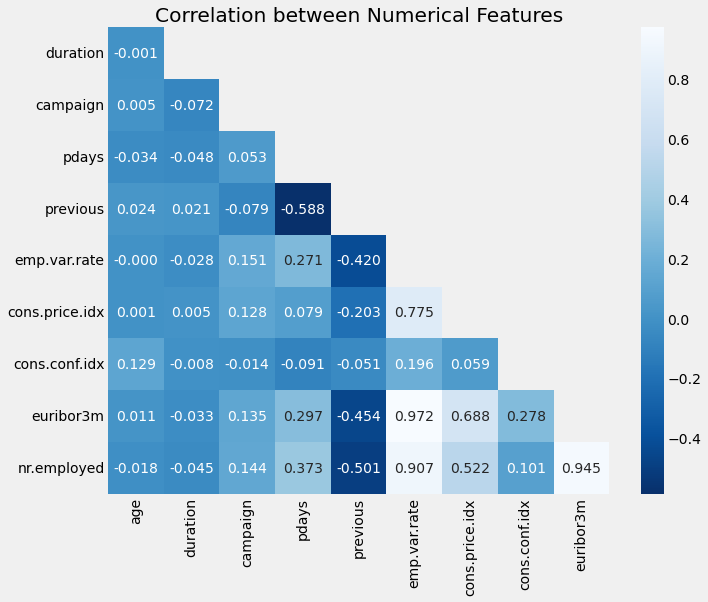

In [221]:
corr_ = df[num_cols].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(index=["age"], columns=["nr.employed"])

plt.figure(figsize = (10, 8))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues_r'
)
plt.title("Correlation between Numerical Features")
plt.yticks(rotation=0)
plt.savefig('fig/eda/num corrplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Those with higher euribor3m and nr_employed are mostly likely to have age below ~60.
- Those who have higher euribor3m, are most likely to have an age below ~60.
- Those who have been contacted multiple times before this campaign (previous) started:
    - Never have a long duration during the last contact (duration),
    - Never have greater number of contacts during this campaign (campaign),
    - Never have greater value of euribor3m and nr_employed.
- Those who have lower emp_var_rate and nr_employed have lower number of contacts during this campaign (campaign) and also lower duration during the last contact (duration).
- Those who have greater emp_var_rate have less number of contacts before this campaign (previous)
- emp_var_rate has positive linear relationship with cons_price_idx, euribor3m, and nr_employed.
- cons_price_idx has positive linear relationship with euribor3m and nr_employed.
- euribor3m has positive linear relationship with nr_employed.
- Those who have lower pdays(number of days that passed by after the client was last contacted from a previous campaign) also has lower euribor3m.

<AxesSubplot:xlabel='euribor3m', ylabel='age'>

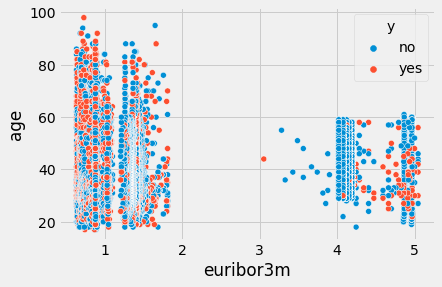

In [222]:
sns.scatterplot(x=df['euribor3m'],y=df['age'],hue=df['y'])

## Categorical Features

In [223]:
cat_cols = list(df.select_dtypes(object).drop(columns=["y"]).columns)
cat_cols[2], cat_cols[1] = cat_cols[1], cat_cols[2]
print("Cat Features Length",len(cat_cols), ":", cat_cols)

Cat Features Length 10 : ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Univariate

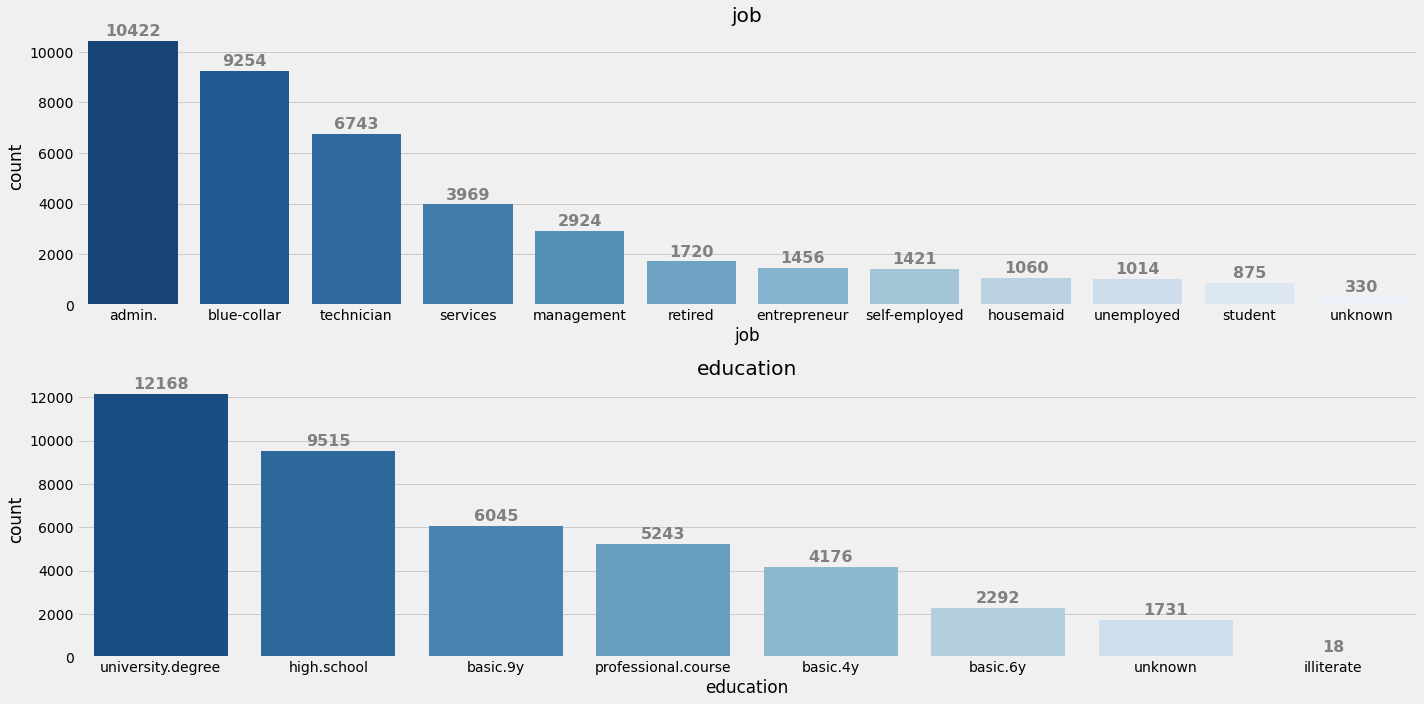

In [224]:
# plot all categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        # order by frequency
        order = df[cat_cols[:2][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[:2][i], fontweight = 20)
plt.tight_layout()
plt.savefig('fig/eda/cat countplot1.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

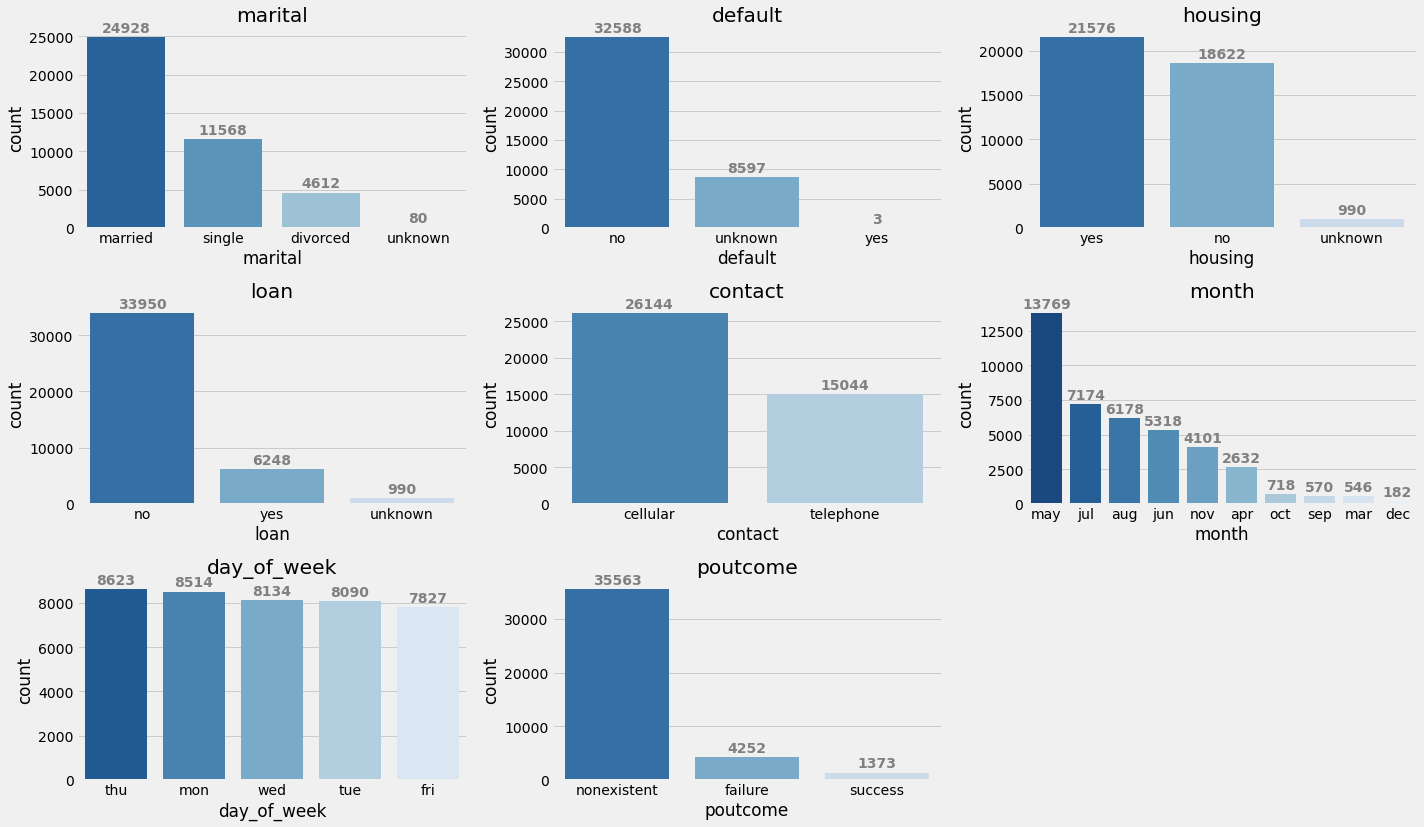

In [225]:
# plot all categorical features
plt.figure(figsize = (20, 15))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//2, 3, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        # order by frequency
        order = df[cat_cols[2:][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[2:][i], fontweight = 20)
plt.tight_layout()
plt.savefig('fig/eda/cat countplot2.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Majority of people have the nonexistent outcomes of the previous marketing campaign (poutcome), no personal loan (loan), no credit in default.
- Majority of people have a job as admin, blue-collar, and technician.
- Majority of people have a university degree.
- Majority of people are married.
- Majority of people have no default credit.
- Majority of people have housing loans.
- Majority of people have no personal loan.
- Majority of people have cellular contacts.
- Majority of people are last contacted in may.
- Majority of people have the nonexistent outcomes from the previous marketing campaign.

### Bivariate

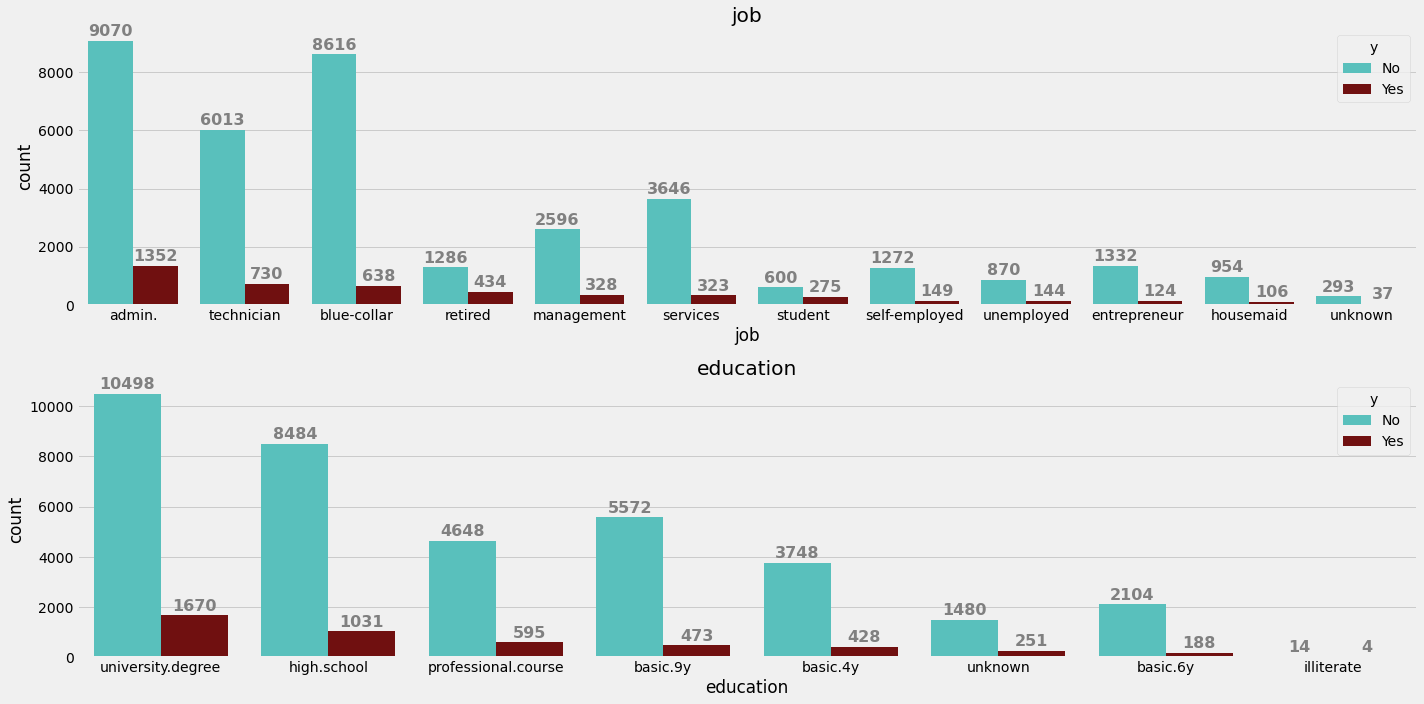

In [226]:
# plot all categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    # plot
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        hue = df['y'],
        order = pd.crosstab(df[cat_cols[:2][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[:2][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.savefig('fig/eda/cat countplot1 biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

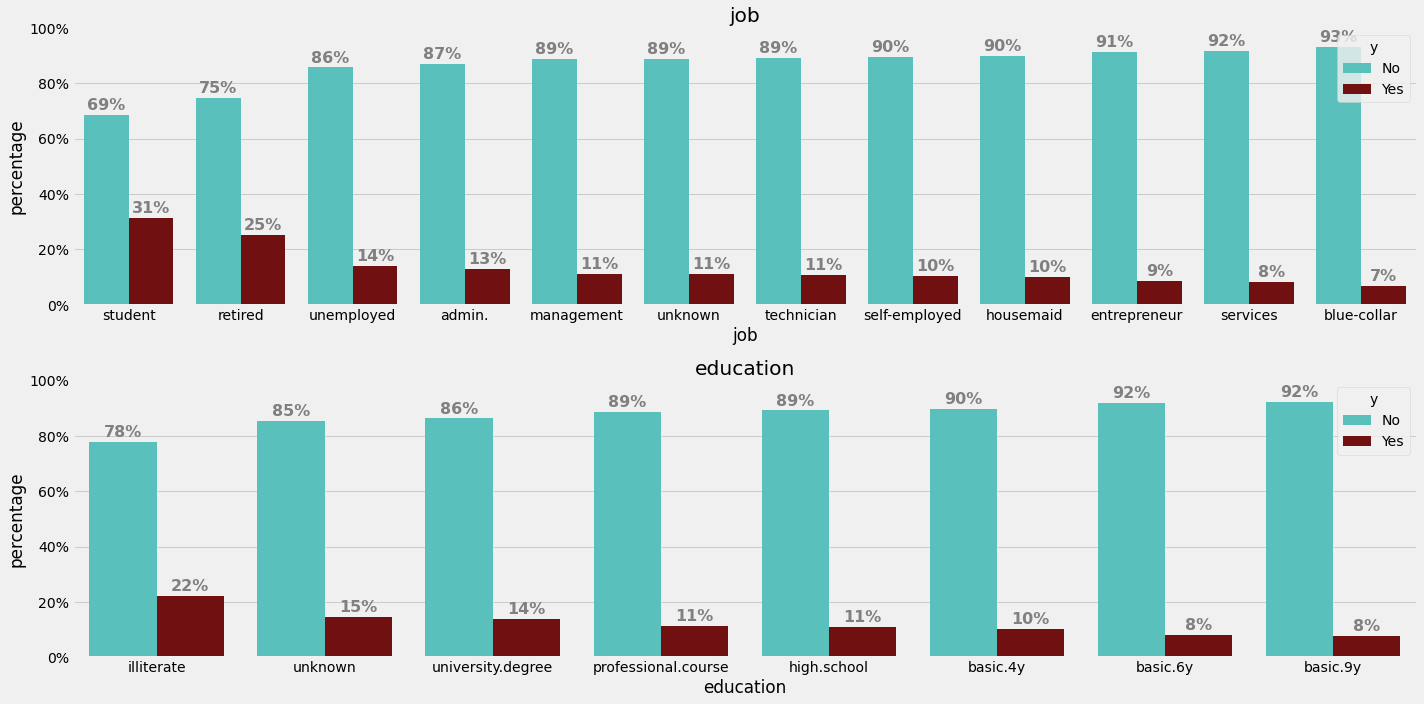

In [227]:
# plot all categorical features in percent
plt.figure(figsize = (20, 10))

for i in range(len(cat_cols[:2])):
    # create percentage df
    dist = df.groupby([str(cat_cols[:2][i]), "y"]).count()[["age"]]
    cat_group = df.groupby([str(cat_cols[:2][i])]).count()[["age"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols[:2][i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols[:2][i]), "y", "count", "percentage"]
    
    # plot
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.barplot(
        x = str(cat_cols[:2][i]),
        y = "percentage",
        hue = "y",
        data = dist,
        palette = {"yes":"maroon", "no":"mediumturquoise"},
        order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index][str(cat_cols[:2][i])],
    )
    ax.set_title(cat_cols[:2][i], fontweight = 20)
    
    # set yticks format
    y_ = [x for x in range(0, 120, 20)]
    plt.yticks(y_)
    ylabels = [format(y) + '%' for y in ax.get_yticks()]
    ax.set_yticklabels(labels = ylabels)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f') + "%",
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        # set legend label
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.savefig('fig/eda/cat countplot1 biv percent.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- The job features has a variety of ratio between its category. There is a student and retired who seems to have a high ratio that subscribed to the product. After cross-check with the absolute value in the previous plot, we found out that the total amount of people who falls into this category is low compared to other categories that have a greater total of people within groups.
- For the education features, those who have the top 2 highest ratios are also coming from categories that have less total of people within the group. Unlike the previous top 2 ratio, the 3rd-5th highest ratio is coming from categories that have a greater total of people within its group.

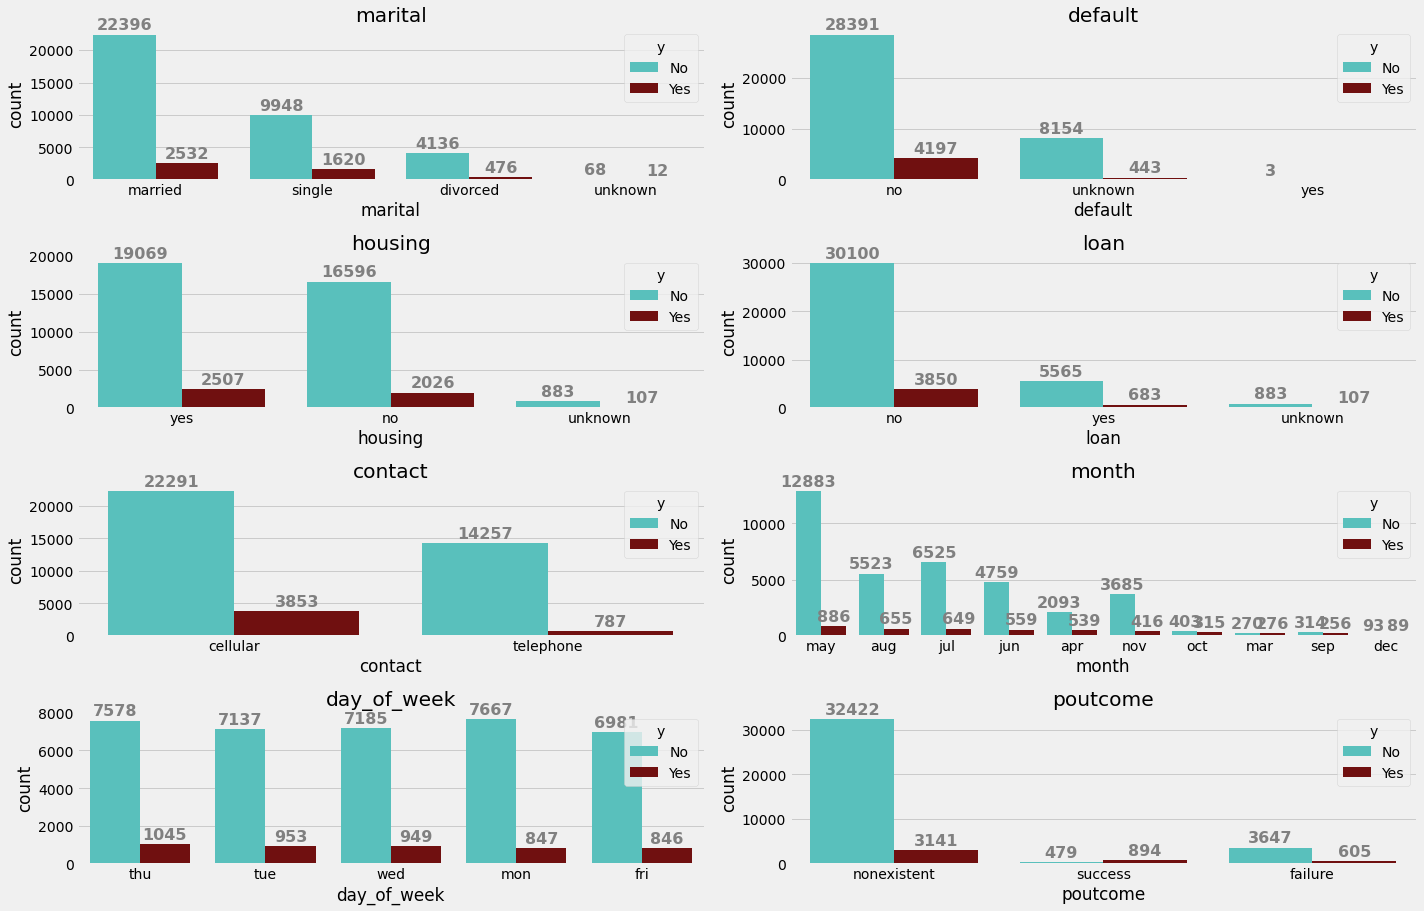

In [228]:
# plot all categorical features
plt.figure(figsize = (20, 25))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        hue = df['y'],
        # order by frequency
        order = pd.crosstab(df[cat_cols[2:][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[2:][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.savefig('fig/eda/cat countplot2 biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

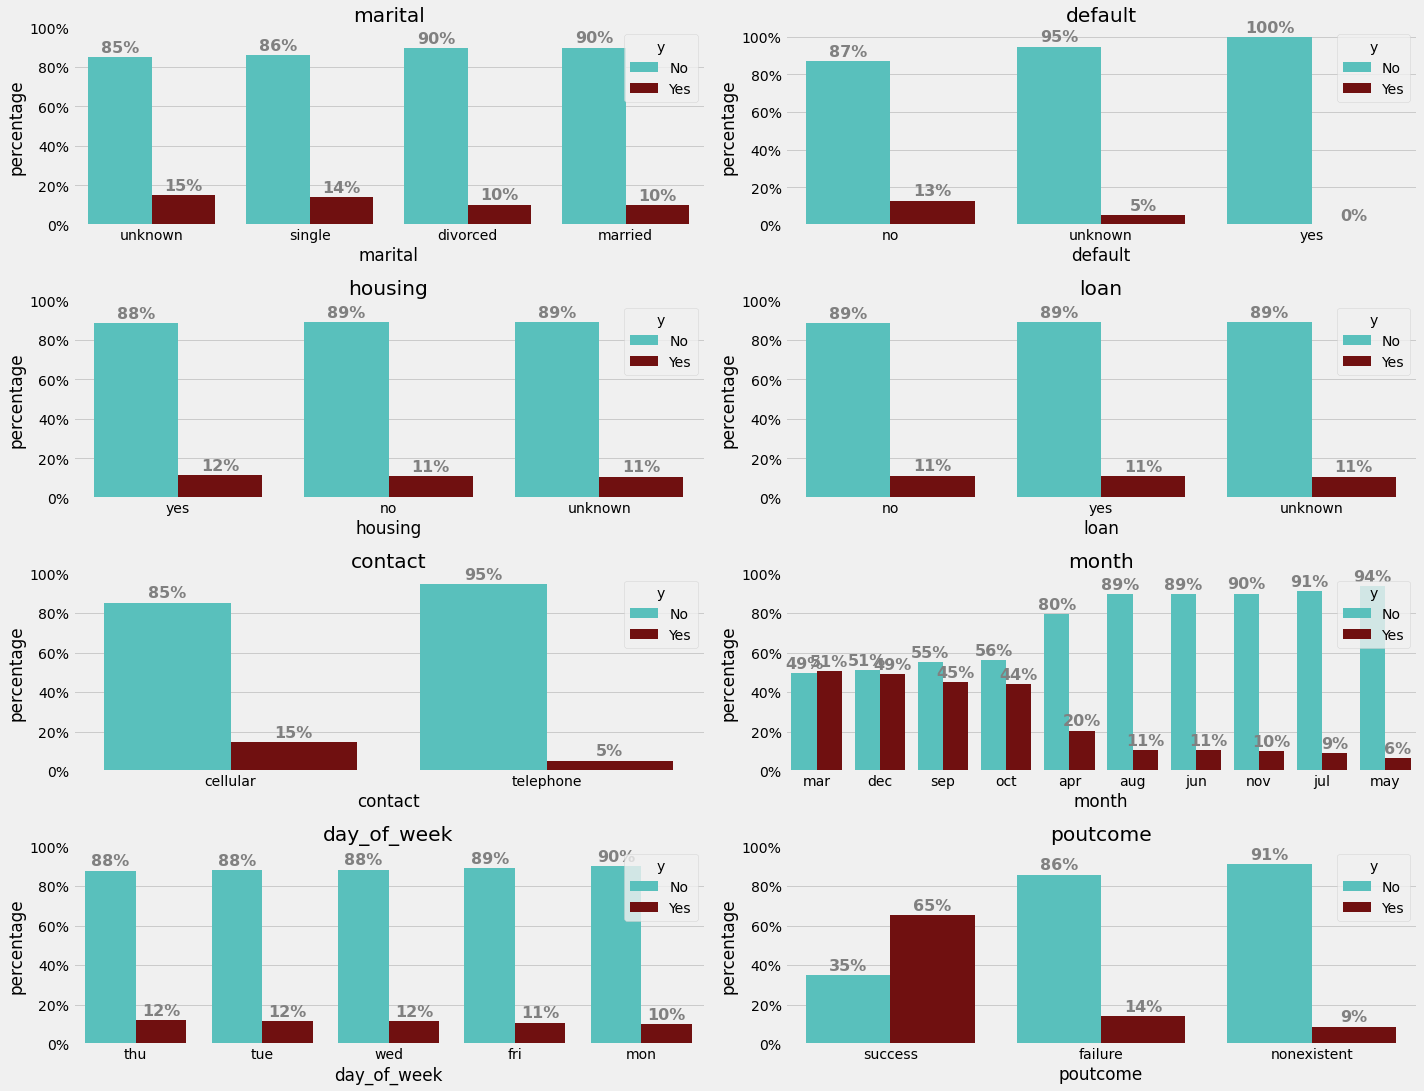

In [229]:
# plot all categorical features in percent
plt.figure(figsize = (20, 30))

for i in range(len(cat_cols[2:])):
    # create percentage df
    dist = df.groupby([str(cat_cols[2:][i]), "y"]).count()[["age"]]
    if cat_cols[2:][i] == "default":
        dist.loc[("yes", "yes"),"age"] = 0
    cat_group = df.groupby([str(cat_cols[2:][i])]).count()[["age"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols[2:][i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols[2:][i]), "y", "count", "percentage"]
    
    # plot
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.barplot(
        x = str(cat_cols[2:][i]),
        y = "percentage",
        hue = "y",
        data = dist,
        order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index][str(cat_cols[2:][i])],
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    ax.set_title(cat_cols[2:][i], fontweight = 20)
    
    # set yticks format
    y_ = [x for x in range(0, 120, 20)]
    plt.yticks(y_)
    ylabels = [format(y) + '%' for y in ax.get_yticks()]
    ax.set_yticklabels(labels = ylabels)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f') + "%",
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        # set legend label
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.savefig('fig/eda/cat countplot2 biv percent.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- For marital features, we know that people whose statuses are unknown have the highest ratio, but if we take a look at the total amount of people in this group, it's not significant because we have a small proportion of people who fall into this group. The 2nd highest ratio is single and it has 2nd highest total of people within its group, so this ratio is significant compared to the highest ratio.
- The majority of people who don't have default credit, have the highest ratio of people who subscribed to the term deposit.
    - A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed. Thus, it makes sense that people who are not able to make timely payments will not subscribe to a term deposit.
- People who have housing loans have a higher ratio of people who subscribed.
- The ratio of people who have loans seems to be equal, but from the total amount of people within the group, those who have no personal loan have a higher amount of people who subscribed.
- Majority of people who have been contacted on their cellphone are more likely to subscribe.
- People who have been contacted in march, december, september, and october seem to have a higher ratio of people who subscribed to the term deposit. But in fact, we found out that the total number of people who are contacted during those months is really low.
- The ratio between each day of the week (the only weekday that existed) is all equal. This feature is not going to give prediction power for the model.
- Those people who have previously succeeded to be converted from the previous marketing campaign, are more likely to subscribe again.

## Target Variable

In [42]:
df.groupby(["y"]).count()[["age"]].rename({"age" : "Count"}, axis = 1)

,Count
y,
no,36548
yes,4640


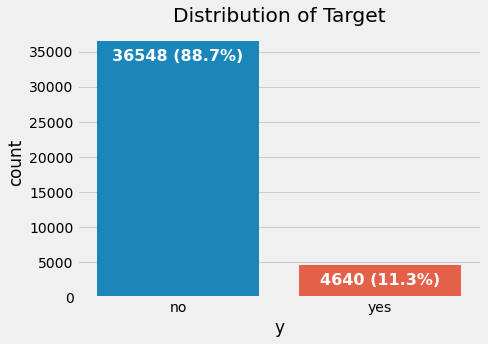

In [43]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(
    x = df["y"],
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -20), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

## Data Preprocessing

### Target Variable

In [44]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["y"], inplace = True)

In [45]:
df[["target"]]

,target
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


### Replace String and Formating

In [46]:
df["job"] = df["job"].str.replace('.', '', regex = False)
df["education"] = df["education"].str.replace('.', ' ', regex = False)

In [47]:
df["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Replace pdays = 999 to -1 because its to far from the distribution

In [48]:
df["pdays"] = df["pdays"].replace(999, -1)

In [49]:
df["pdays"].value_counts().head(5)

-1    39673
 3      439
 6      412
 4      118
 9       64
Name: pdays, dtype: int64

## Feature Selection

Based on EDA, we see there's some of the numerical features that are highly correlated. Therefore we should remove the highly correlated features so that our model doesn't confuse which feature that affect the decision. But to understand the whole correlation we will calculate VIF (Variation Inflation Factor).

A correlation plot can be used to identify the correlation or bivariate relationship between two independent variables whereas VIF is used to identify the correlation of one independent variable with a group of other variables. Hence, it is preferred to use VIF for better understanding.

Source: <a href="https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc">Understanding Multicollinearity and How to Detect it in Python</a>

In [50]:
df_features = df.drop(columns=["target"])

In [51]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,16.048235
1,duration,2.011033
2,campaign,1.921458
3,pdays,1.754240
4,previous,1.810101
5,emp.var.rate,28.958730
6,cons.price.idx,22655.447015
7,cons.conf.idx,119.593182
8,euribor3m,226.426364
9,nr.employed,26609.278929


First we will try to drop the features with VIF score ~20.000

In [53]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,14.704493
1,duration,1.997535
2,campaign,1.911167
3,pdays,1.702980
4,previous,1.744925
5,emp.var.rate,9.411669
6,cons.conf.idx,32.211814
7,euribor3m,44.697572


In [55]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed", "euribor3m"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed", "euribor3m"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,12.266001
1,duration,1.989226
2,campaign,1.910573
3,pdays,1.695777
4,previous,1.737543
5,emp.var.rate,1.246314
6,cons.conf.idx,14.317505


In [57]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed", "euribor3m", "pdays", "cons.conf.idx"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons.price.idx", "nr.employed", "euribor3m", "pdays", "cons.conf.idx"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,2.806385
1,duration,1.876292
2,campaign,1.807322
3,previous,1.357120
4,emp.var.rate,1.238962


In [62]:
num_cols_multicoll = ["cons.price.idx", "nr.employed", "euribor3m", "pdays", "cons.conf.idx"]

In [63]:
num_cols = list(vif["features"].values)
num_cols

['age', 'duration', 'campaign', 'previous', 'emp.var.rate']

Drop features with multicollinearity (above > 10).

In [64]:
df.drop(columns=num_cols_multicoll, inplace=True)

## Feature Encoding

In [65]:
df[cat_cols].head()

,job,education,marital,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,basic 4y,married,no,no,no,telephone,may,mon,nonexistent
1,services,high school,married,unknown,no,no,telephone,may,mon,nonexistent
2,services,high school,married,no,yes,no,telephone,may,mon,nonexistent
3,admin,basic 6y,married,no,no,no,telephone,may,mon,nonexistent
4,services,high school,married,no,no,yes,telephone,may,mon,nonexistent


  Non-ordinal feature:
- job, marital, default, housing, loan, contact, poutcome.
- encoded using k-1 one hot encoder.

Ordinal feature:
- <a href="https://en.wikipedia.org/wiki/Education_in_Portugal#Professional_Programmes">education</a>.
- encoded using ordinal encoder.

Cyclical feature:
- month and day_of week.
- encoded using sine and consine transformation method.

### Non-ordinal

In [66]:
non_ordinal_cols = [i for i in cat_cols if i not in ["education", "month", "day_of_week"]]

In [67]:
for i in range(len(non_ordinal_cols)):
    dummies = pd.get_dummies(df[non_ordinal_cols[i]], prefix = non_ordinal_cols[i], drop_first=True)
    df = pd.concat([df, dummies], axis = 1)
    
df.drop(columns = non_ordinal_cols, inplace = True)

In [68]:
print(df.shape)
df.head()

(41188, 32)


,age,education,month,day_of_week,duration,campaign,previous,emp.var.rate,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,basic 4y,may,mon,261,1,0,1.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,57,high school,may,mon,149,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,37,high school,may,mon,226,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,40,basic 6y,may,mon,151,1,0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,56,high school,may,mon,307,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0


### Ordinal

In [69]:
df["education"].value_counts()

university degree      12168
high school             9515
basic 9y                6045
professional course     5243
basic 4y                4176
basic 6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [70]:
education_encoder = OrdinalEncoder(categories = [['illiterate', 'basic 4y', 'basic 6y', 'basic 9y', 'high school', 'professional course', 'university degree']], handle_unknown="use_encoded_value", unknown_value=-1, dtype = np.int64)

In [71]:
except_unknown_idx = list(df[df['education'] != 'unknown'].index)
unknown_idx = list(df[df['education'] == 'unknown'].index)

In [72]:
df.loc[except_unknown_idx, 'education'] = education_encoder.fit_transform(np.expand_dims(np.array(df['education'].iloc[except_unknown_idx]), axis=1))

In [73]:
df.loc[unknown_idx, 'education'] = education_encoder.transform(np.expand_dims(np.array(df['education'].iloc[unknown_idx]), axis=1))

In [74]:
df["education"].value_counts()

 6    12168
 4     9515
 3     6045
 5     5243
 1     4176
 2     2292
-1     1731
 0       18
Name: education, dtype: int64

Save ordinal encoder for deployment

In [75]:
joblib.dump(education_encoder, 'model/education_encoder.joblib')

['model/education_encoder.joblib']

### Cyclical

As for cyclical features, we will to encoding and then feature engineering to calculate sin and cos.

In [76]:
df[["month", "day_of_week"]].head()

,month,day_of_week
0,may,mon
1,may,mon
2,may,mon
3,may,mon
4,may,mon


In [77]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [78]:
month_mapping = {
    'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
    'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}
df['month']=df['month'].replace(month_mapping)

In [79]:
df['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

The month column only has 10 unique values, but the actual month count is 12.

In [80]:
df['month_sin'] = np.sin(df.month*(2.*np.pi/12))
df['month_cos'] = np.cos(df.month*(2.*np.pi/12))

In [81]:
df["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [82]:
day_mapping = {
    'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4, 'sat':5, 'sun':6
}
df['day_of_week']=df['day_of_week'].replace(day_mapping)

In [83]:
df['day_of_week'].value_counts()

3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

The day_of_week column only has 5 unique values, but the actual month count is 7. But we know that the bank operational day is from monday-friday. Thus, we don't have to include them.

In [84]:
df['day_of_week_sin'] = np.sin(df.day_of_week*(2.*np.pi/5))
df['day_of_week_cos'] = np.cos(df.day_of_week*(2.*np.pi/5))

In [85]:
df.drop(columns=['month', 'day_of_week'], inplace = True)

In [86]:
print(df.shape)
df.head()

(41188, 34)


,age,education,duration,campaign,previous,emp.var.rate,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,56,1,261,1,0,1.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
1,57,4,149,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
2,37,4,226,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0.5,-0.866025,0.0,1.0
3,40,2,151,1,0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
4,56,4,307,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0.5,-0.866025,0.0,1.0


## Splitting Dataset

In [87]:
X = df.drop(columns = ['target'], axis = 1)
y = df['target']

Splitting data to test 10%, validation 20%, and train 70%

In [88]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [89]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [90]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.6999854326502865 0.20000971156647568 0.10000485578323784


Checking the proportion (effect of stratify param)

In [91]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.11265651555617218 0.11264870114105366 0.11264870114105366


## Features Scaling using Pipeline

In [92]:
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [93]:
scaling_pipeline.fit(X_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [94]:
joblib.dump(scaling_pipeline, 'model/scaling_pipeline.pkl')

['model/scaling_pipeline.pkl']

Scaling the data since we have features that have very different range of value. This will be a problem if we didn't do scaling for the model that based on distance.

In [95]:
X_train_trf = scaling_pipeline.transform(X_train)
X_val_trf = scaling_pipeline.transform(X_val)
X_test_trf = scaling_pipeline.transform(X_test)

# Tuning with Grid Search CV

Since we have an imbalanced class in the target variable, the evaluation metrics that will be used is the one that can give the accuracy estimation even the proportion of the training set is imbalanced. Thus, we can use AUC that takes TPR and FPR into consideration. These metrics could show how well our model differentiates between 2 classes. We will also take f1 into account as validation.

**Logistic Regression**

In [96]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.1, 1.0]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
logreg = LogisticRegression(random_state = 42, solver='liblinear')
logreg_grid = GridSearchCV(logreg, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
logreg_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.1, 1.0],
                         'penalty': ['l1', 'l2']},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [97]:
logreg_grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [98]:
logreg_grid.best_score_

0.9234204616779642

In [99]:
logreg_df = pd.DataFrame(logreg_grid.cv_results_)[['param_penalty', 'params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
logreg_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,param_penalty,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
4,l1,"{'C': 0.1, 'penalty': 'l1'}",0.923420,0.924717,0.003819,0.471366,0.475647,0.019848
3,l2,"{'C': 0.001, 'penalty': 'l2'}",0.923368,0.924550,0.003790,0.444772,0.446860,0.020028
5,l2,"{'C': 0.1, 'penalty': 'l2'}",0.923156,0.924613,0.003852,0.473987,0.477965,0.021646
6,l1,"{'C': 1.0, 'penalty': 'l1'}",0.923062,0.924510,0.003860,0.473257,0.478877,0.020217
7,l2,"{'C': 1.0, 'penalty': 'l2'}",0.923029,0.924494,0.003865,0.473459,0.478929,0.019846
2,l1,"{'C': 0.001, 'penalty': 'l1'}",0.919563,0.919679,0.004086,0.205420,0.206407,0.016706
1,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.906020,0.907066,0.005573,0.434174,0.436094,0.020396
0,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.500000,0.500000,0.000000,0.000000,0.000000,0.000000


**SVC**

In [100]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [102]:
hyperparameters = {
    'kernel': ['poly', 'rbf']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
svc = SVC(random_state = 42, gamma = 'auto', max_iter = 2000)
svc_grid = GridSearchCV(svc, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
svc_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', max_iter=2000, random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [103]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [104]:
svc_grid.best_score_

0.901993359773021

In [105]:
svc_df = pd.DataFrame(svc_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
svc_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
1,{'kernel': 'rbf'},0.901993,0.920012,0.005494,0.500406,0.60535,0.020543
0,{'kernel': 'poly'},0.711537,0.772444,0.048344,0.216544,0.22691,0.021112


**Decision Tree**

In [106]:
hyperparameters = {
    'max_depth': [2, 10, 30, 100],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf' : [2, 4, 10, 25],
    'max_features' : ['auto', 'sqrt']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
dt = DecisionTreeClassifier(random_state = 42)
dt_grid = GridSearchCV(dt, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
dt_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 30, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 10, 25],
                         'min_samples_split': [2, 5, 10, 100]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [107]:
dt_grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 25,
 'min_samples_split': 2}

In [108]:
dt_grid.best_score_

0.8874151968588228

In [109]:
dt_df = pd.DataFrame(dt_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
dt_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
76,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.887415,0.925159,0.007071,0.410539,0.486482,0.033711
77,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.887415,0.925159,0.007071,0.410539,0.486482,0.033711
78,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.887415,0.925159,0.007071,0.410539,0.486482,0.033711
92,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.887415,0.925159,0.007071,0.410539,0.486482,0.033711
93,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.887415,0.925159,0.007071,0.410539,0.486482,0.033711
...,...,...,...,...,...,...,...
27,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593868,0.593858,0.008818,0.000000,0.000000,0.000000
28,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593868,0.593858,0.008818,0.000000,0.000000,0.000000
29,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593868,0.593858,0.008818,0.000000,0.000000,0.000000
30,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593868,0.593858,0.008818,0.000000,0.000000,0.000000


**Random Forest**

In [110]:
hyperparameters = {
    'max_depth': [10, 30],
    'min_samples_split': [2],
    'min_samples_leaf' : [10],
    'max_features' : ['auto'],
    'n_estimators': [50, 100]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
rf = RandomForestClassifier(random_state = 42)
rf_grid = GridSearchCV(rf, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
rf_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 30], 'max_features': ['auto'],
                         'min_samples_leaf': [10], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [111]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [112]:
rf_grid.best_score_

0.9404276508643582

In [113]:
rf_df = pd.DataFrame(rf_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
rf_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
3,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.940428,0.964302,0.003422,0.450865,0.573332,0.016367
2,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.939896,0.964002,0.003608,0.449391,0.567811,0.015880
1,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.938032,0.952901,0.003427,0.354008,0.421872,0.023312
0,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.937862,0.952940,0.003352,0.359199,0.426788,0.025655


**KNearest Neighbors**

In [114]:
hyperparameters = {
    'n_neighbors': [3, 5],
    'p': [1, 2]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
knn_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2]}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [115]:
knn_grid.best_params_

{'n_neighbors': 5, 'p': 2}

In [116]:
knn_grid.best_score_

0.812662518494696

In [117]:
knn_df = pd.DataFrame(knn_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
knn_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
3,"{'n_neighbors': 5, 'p': 2}",0.812663,0.957577,0.008143,0.383205,0.541926,0.017089
2,"{'n_neighbors': 5, 'p': 1}",0.798095,0.957659,0.009825,0.350900,0.506974,0.018870
1,"{'n_neighbors': 3, 'p': 2}",0.769659,0.970794,0.010749,0.396113,0.651934,0.020934
0,"{'n_neighbors': 3, 'p': 1}",0.754995,0.971874,0.011208,0.368950,0.637726,0.019557


**Gaussian Naive Bayes**

In [118]:
hyperparameters = {
    'var_smoothing': np.logspace(0,-9, num=10)
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
gnb = GaussianNB()
gnb_grid = GridSearchCV(gnb, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
gnb_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [119]:
gnb_grid.best_params_

{'var_smoothing': 1.0}

In [120]:
gnb_grid.best_score_

0.8451046587622681

In [121]:
gnb_df = pd.DataFrame(gnb_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
gnb_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
0,{'var_smoothing': 1.0},0.845105,0.847419,0.009229,0.399125,0.398465,0.005570
1,{'var_smoothing': 0.1},0.830080,0.833306,0.008896,0.407615,0.411147,0.017021
2,{'var_smoothing': 0.01},0.827278,0.830561,0.008890,0.407455,0.407188,0.014729
3,{'var_smoothing': 0.001},0.826854,0.830160,0.008879,0.415984,0.419180,0.018433
4,{'var_smoothing': 0.0001},0.826797,0.830080,0.008854,0.415379,0.417028,0.010150
5,{'var_smoothing': 1e-05},0.826760,0.830051,0.008862,0.388270,0.392958,0.006849
6,{'var_smoothing': 1e-06},0.826749,0.830036,0.008840,0.342249,0.344574,0.011084
7,{'var_smoothing': 1e-07},0.826745,0.830029,0.008820,0.303454,0.306092,0.005738
8,{'var_smoothing': 1e-08},0.826712,0.830011,0.008832,0.271840,0.273175,0.009366
9,{'var_smoothing': 1e-09},0.826648,0.829956,0.008824,0.247261,0.247987,0.005505


**AdaBoost**

In [122]:
hyperparameters = {
    'learning_rate': [0.1, 1],
    'n_estimators': [20, 50]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
adb = AdaBoostClassifier(random_state = 42)
adb_grid = GridSearchCV(adb, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
adb_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 1], 'n_estimators': [20, 50]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [123]:
adb_grid.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [124]:
adb_grid.best_score_

0.9323338639751221

In [125]:
adb_df = pd.DataFrame(adb_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
adb_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
3,"{'learning_rate': 1, 'n_estimators': 50}",0.932334,0.936397,0.004476,0.493013,0.501569,0.023049
2,"{'learning_rate': 1, 'n_estimators': 20}",0.929265,0.932199,0.004545,0.484924,0.490498,0.018044
1,"{'learning_rate': 0.1, 'n_estimators': 50}",0.920046,0.922281,0.004747,0.289708,0.290939,0.026210
0,"{'learning_rate': 0.1, 'n_estimators': 20}",0.902378,0.904865,0.004055,0.064882,0.064450,0.015649


## Defining Model

We will compare model performances between Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Baiyes, and AdaBoost to see the performance of this dataset using ensemble-boosting method

In [126]:
models_dict = {}

In [127]:
models_dict["Logistic Regression"] = LogisticRegression(random_state = 42, C = 0.001, penalty = 'l2')
models_dict["SVM"] = SVC(random_state = 42, gamma = 'auto', max_iter = 2000, kernel = 'rbf', probability = True)
models_dict["Decision Tree"] = DecisionTreeClassifier(random_state = 42, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 100)
models_dict["Random Forest"] = RandomForestClassifier(random_state = 42, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 2, n_estimators = 100)
models_dict["KNearest Neighbors"] = KNeighborsClassifier(n_neighbors = 5, p = 2)
models_dict["Gaussian Naive Bayes"] = GaussianNB(var_smoothing = 1.0)
models_dict["AdaBoost"] = AdaBoostClassifier(random_state = 42, learning_rate = 1, n_estimators = 50)

## Model Training

In [128]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_trf, y_train)

Training model Logistic Regression
CPU times: user 125 ms, sys: 68.7 ms, total: 194 ms
Wall time: 37.4 ms
Training model SVM
CPU times: user 24.7 s, sys: 763 ms, total: 25.5 s
Wall time: 24.5 s
Training model Decision Tree
CPU times: user 19.4 ms, sys: 771 µs, total: 20.1 ms
Wall time: 20 ms
Training model Random Forest
CPU times: user 1.18 s, sys: 47 ms, total: 1.22 s
Wall time: 1.22 s
Training model KNearest Neighbors
CPU times: user 1.21 ms, sys: 131 µs, total: 1.34 ms
Wall time: 1.2 ms
Training model Gaussian Naive Bayes
CPU times: user 6.31 ms, sys: 1.86 ms, total: 8.16 ms
Wall time: 8.07 ms
Training model AdaBoost
CPU times: user 555 ms, sys: 72.3 ms, total: 627 ms
Wall time: 627 ms


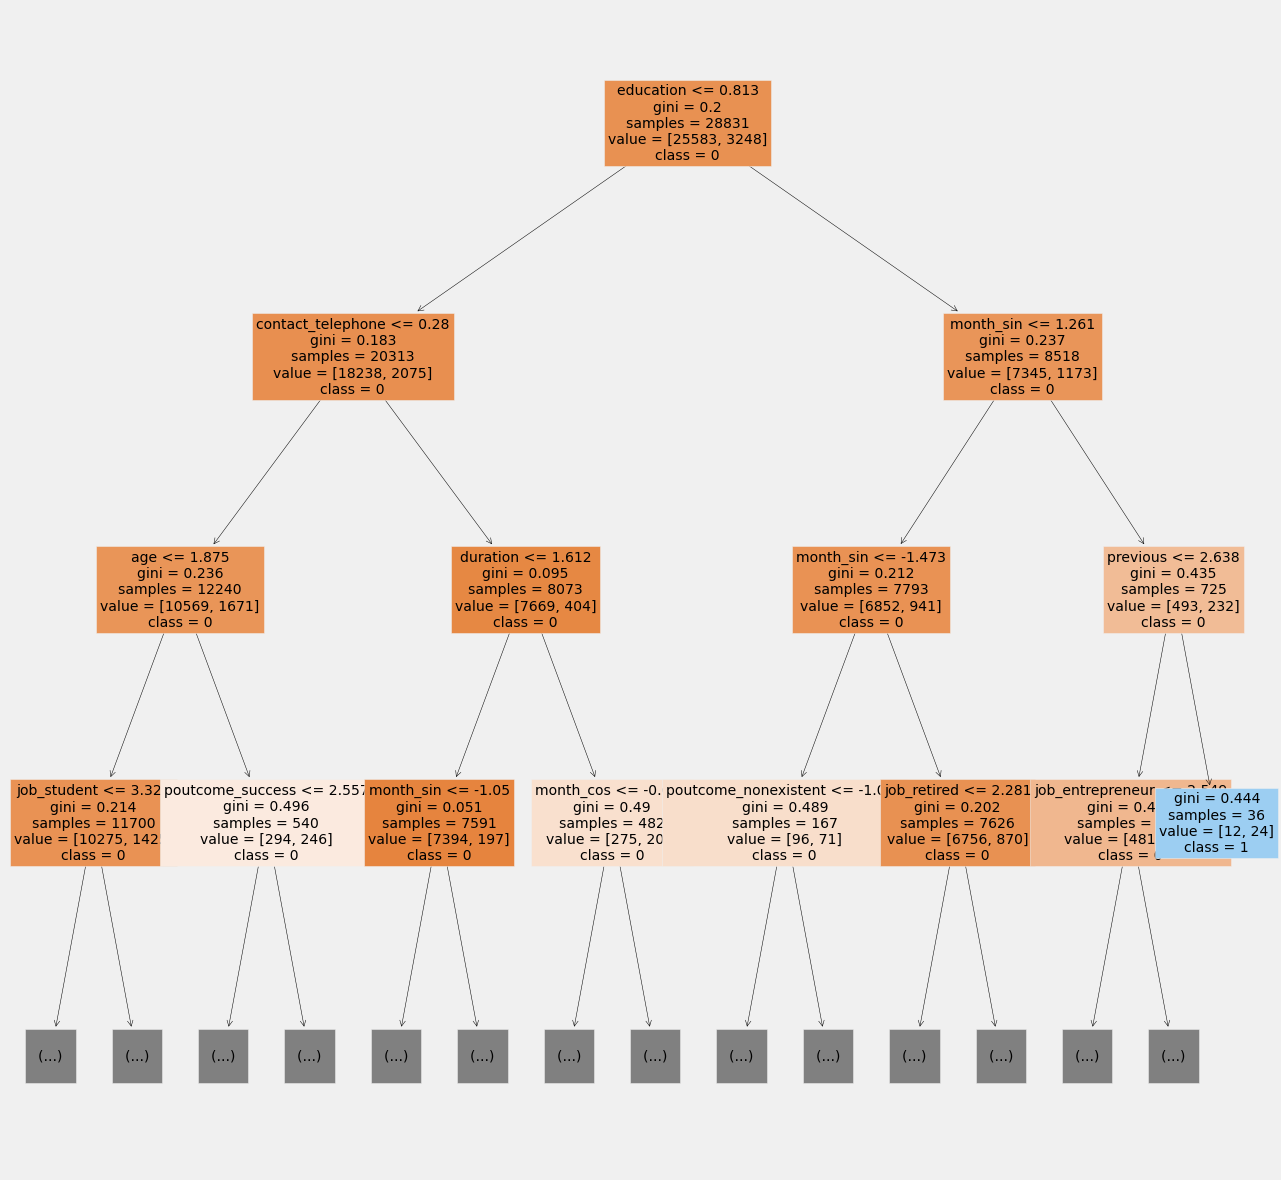

In [129]:
plt.figure(figsize=(20,20))
tree.plot_tree(
    models_dict["Decision Tree"], feature_names = X.columns.tolist(),
    class_names=["0","1"],
    filled = True, max_depth = 3, fontsize = 14
)
plt.show()

For decision tree models, from the plot above, we know that education has the lowest value of gini impurity index compared to individual features simple tree gini impurity index, that's why it becomes the first/root node.

## Feature Importance

**Logistic Regression**

In [130]:
from sklearn.inspection import permutation_importance

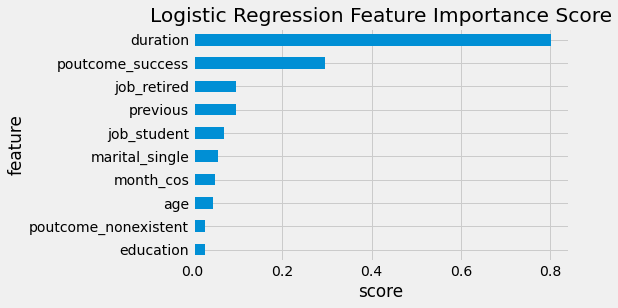

In [131]:
feat_importances = pd.Series(models_dict["Logistic Regression"].coef_[0], index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Logistic Regression Feature Importance Score')
plt.show()

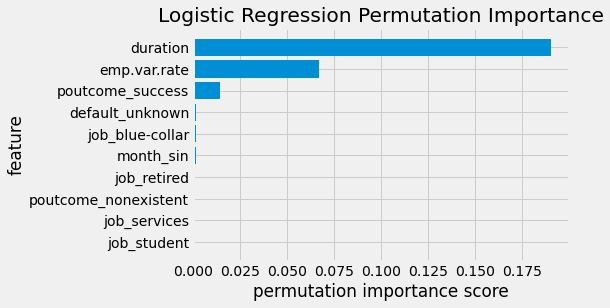

In [132]:
perm_importance = permutation_importance(models_dict["Logistic Regression"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()[-10:]

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('Logistic Regression Permutation Importance')
plt.show()

**SVC**

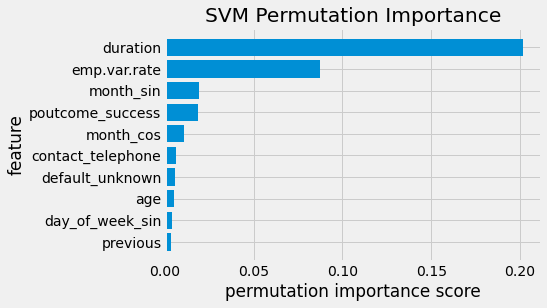

In [133]:
perm_importance = permutation_importance(models_dict["SVM"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()[-10:]

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('SVM Permutation Importance')
plt.show()

**Decision Tree**

In [134]:
# for tree based model
def feature_importance(model, name):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh')
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{name} Feature Importance Score ')

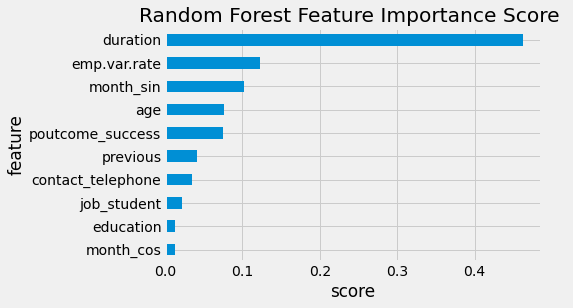

In [135]:
feature_importance(models_dict["Decision Tree"], 'Random Forest')
plt.show()

**Random Forest**

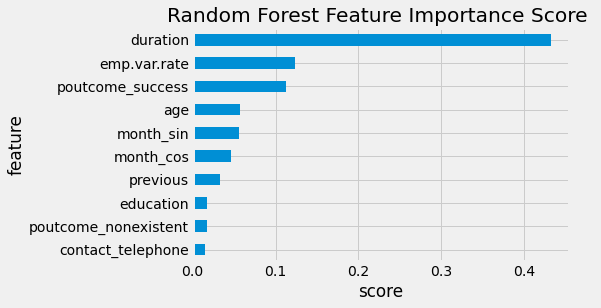

In [136]:
feature_importance(models_dict["Random Forest"], 'Random Forest')
plt.show()

**KNN**

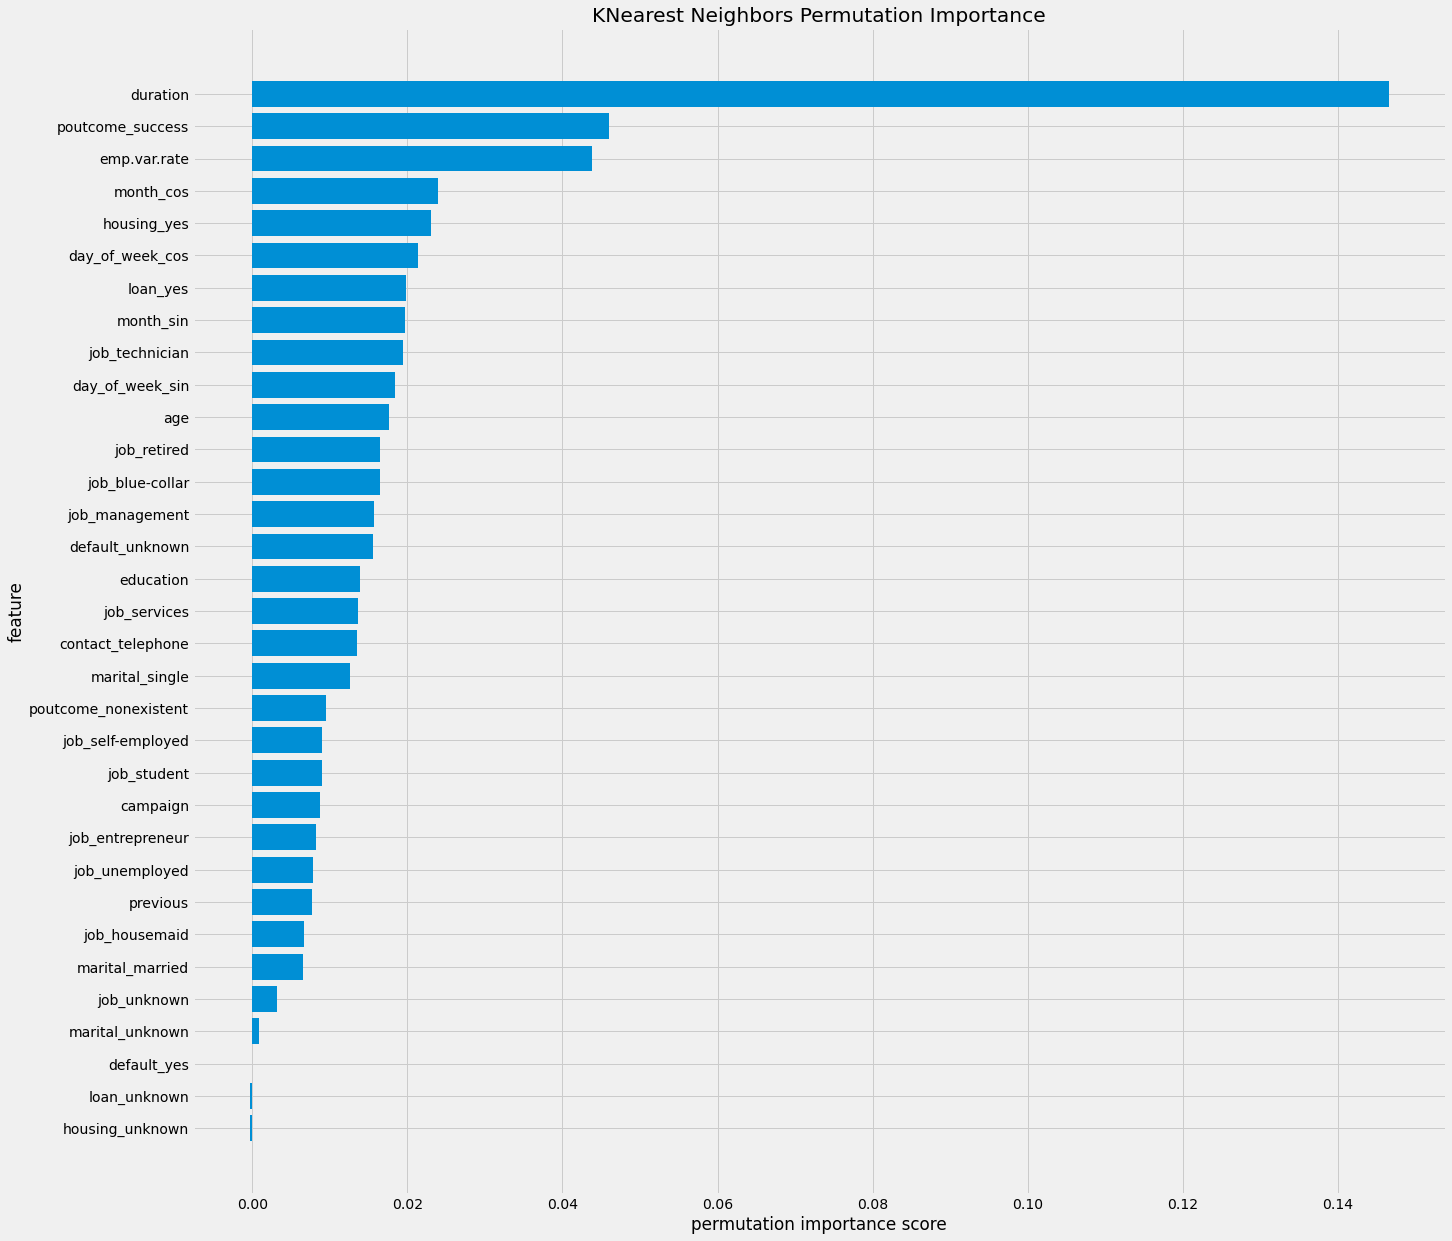

In [200]:
perm_importance = permutation_importance(models_dict["KNearest Neighbors"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20, 20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('KNearest Neighbors Permutation Importance')
plt.show()

**Gaussian Naive Baiyes**

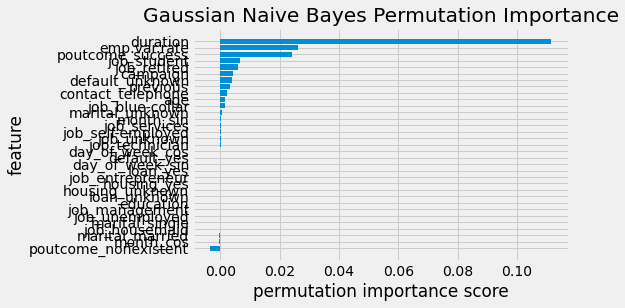

In [138]:
perm_importance = permutation_importance(models_dict["Gaussian Naive Bayes"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('Gaussian Naive Bayes Permutation Importance')
plt.show()

**AdaBoost**

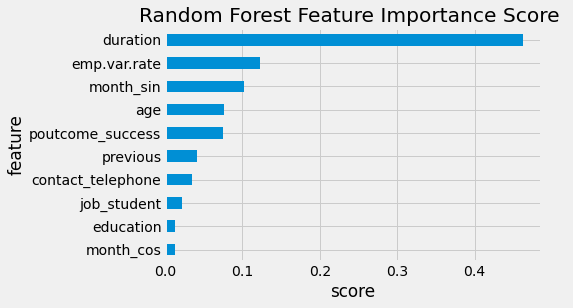

In [139]:
feature_importance(models_dict["Decision Tree"], 'Random Forest')
plt.show()

## Cross Validation Score

Since we have an imbalanced class in the target variable, the evaluation metrics that will be used is the one that can give the accuracy estimation even the proportion of the training set is imbalanced. Thus, we can use AUC that takes TPR and FPR into consideration. These metrics could show how well our model differentiates between 2 classes.

In [140]:
def display_score(scores):
    '''
    function to display cross validation mean and std.
    '''
    print(f"Scores: {scores}")
    print(f"Scores mean: {scores.mean()}")
    print(f"Scores Standar Deviation: {scores.std()}")

In [141]:
# create list to store cv scores
scores_cv = []

for model_name, model in models_dict.items():
    print(f"Cross Validation Scores of {model_name}")
    scores = cross_val_score(model, X_train_trf, y_train, scoring = 'roc_auc', cv = 5)
    scores_cv.append(scores)
    display_score(scores)
    print("\n")

Cross Validation Scores of Logistic Regression
Scores: [0.91980487 0.92747068 0.91632171 0.91515186 0.92003067]
Scores mean: 0.9197559600317279
Scores Standar Deviation: 0.004303176249627306


Cross Validation Scores of SVM
Scores: [0.90435081 0.8912131  0.90449341 0.90658988 0.9033196 ]
Scores mean: 0.901993359773021
Scores Standar Deviation: 0.0054937909617861535


Cross Validation Scores of Decision Tree
Scores: [0.89591212 0.89781456 0.86391505 0.87872271 0.87655635]
Scores mean: 0.8825841584947753
Scores Standar Deviation: 0.012723053405370287


Cross Validation Scores of Random Forest
Scores: [0.9427453  0.94477185 0.93833435 0.93502135 0.94126541]
Scores mean: 0.9404276508643582
Scores Standar Deviation: 0.0034221444020176126


Cross Validation Scores of KNearest Neighbors
Scores: [0.82009411 0.81832967 0.81033749 0.79776854 0.81678279]
Scores mean: 0.812662518494696
Scores Standar Deviation: 0.008143195082328337


Cross Validation Scores of Gaussian Naive Bayes
Scores: [0.85029

## Model Evaluation

In [142]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  

## Validation

In [145]:
# create list to store prediciton results
train_prediction_results = []
val_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    model_pred_val = model.predict(X_val_trf)
    
    # append result to list
    val_prediction_results.append(model_pred_val)
    
    model_pred_train = model.predict(X_train_trf)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 2.06 ms
Model Validation on SVM
elapsed time: 10257.05 ms
Model Validation on Decision Tree
elapsed time: 4.0 ms
Model Validation on Random Forest
elapsed time: 302.39 ms
Model Validation on KNearest Neighbors
elapsed time: 14684.43 ms
Model Validation on Gaussian Naive Bayes
elapsed time: 9.4 ms
Model Validation on AdaBoost
elapsed time: 121.95 ms


In [146]:
# create list to store prediciton results
y_scores_train = []
y_scores_val = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    scores_val = model.predict_proba(X_val_trf)
    
    # append result to list
    y_scores_val.append(scores_val)
    
    scores_train = model.predict_proba(X_train_trf)
    y_scores_train.append(scores_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 2.65 ms
Model Validation on SVM
elapsed time: 11629.73 ms
Model Validation on Decision Tree
elapsed time: 4.27 ms
Model Validation on Random Forest
elapsed time: 304.83 ms
Model Validation on KNearest Neighbors
elapsed time: 14918.34 ms
Model Validation on Gaussian Naive Bayes
elapsed time: 10.92 ms
Model Validation on AdaBoost
elapsed time: 106.22 ms


## Evaluation

In [147]:
# create list to append evaluation metrics val
f1_val = []
roc_auc_val = []
precision_val = []
recall_val = []
confusion_m_val = []
c_report_val = []

# calculate error val
for y_pred in val_prediction_results:
    roc_auc_val.append(roc_auc_score(y_val, y_pred))
    f1_val.append(f1_score(y_val, y_pred))
    precision_val.append(precision_score(y_val, y_pred))
    recall_val.append(recall_score(y_val, y_pred))
    confusion_m_val.append(confusion_matrix(y_val, y_pred))
    c_report_val.append(classification_report(y_val, y_pred))
    
# create list to append evaluation metrics train
f1_train = []
roc_auc_train = []
precision_train = []
recall_train = []
confusion_m_train = []
c_report_train = []

# calculate error train
for y_pred in train_prediction_results:
    roc_auc_train.append(roc_auc_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    c_report_train.append(classification_report(y_train, y_pred))

In [148]:
# create list to append fpr, tpr, and threshold val
fpr_val = []
tpr_val = []
threshold_val = []

# calculate curve val
for y_score in y_scores_val:
    fpr_val.append(roc_curve(y_val, y_score[:, 1])[0])
    tpr_val.append(roc_curve(y_val, y_score[:, 1])[1])
    threshold_val.append(roc_curve(y_val, y_score[:, 1])[0])

# create list to append fpr, tpr, and threshold tain
fpr_train = []
tpr_train = []
threshold_train = []

# calculate curve train
for y_score in y_scores_train:
    fpr_train.append(roc_curve(y_train, y_score[:, 1])[0])
    tpr_train.append(roc_curve(y_train, y_score[:, 1])[1])
    threshold_train.append(roc_curve(y_train, y_score[:, 1])[0])

In [149]:
# save models name to list for later
models_name = list(models_dict.keys())

In [150]:
# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'ROC_AUC_val': roc_auc_val,
    'ROC_AUC_train': roc_auc_train,
    'F1_val': f1_val, 
    'F1_train': f1_train, 
    'Precision_val': precision_val,
    'Precision_train': precision_train,
    'Recall_val': recall_val,
    'Recall_train': recall_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results = pd.DataFrame(data=eval_dict)
df_results = df_results.set_index("model")

In [151]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train', 'F1_val', 'F1_train'], ascending = False)

,ROC_AUC_val,ROC_AUC_train,F1_val,F1_train,Precision_val,Precision_train,Recall_val,Recall_train,Time_Elapsed
model,,,,,,,,,
Decision Tree,0.694312,0.699347,0.500319,0.509996,0.613459,0.622449,0.422414,0.431958,4.00
AdaBoost,0.683980,0.687087,0.489037,0.494892,0.637782,0.641806,0.396552,0.402709,121.95
Random Forest,0.674957,0.722519,0.484806,0.587515,0.704312,0.819735,0.369612,0.457820,302.39
SVM,0.654323,0.681658,0.418605,0.480780,0.522581,0.614868,0.349138,0.394704,10257.05
Gaussian Naive Bayes,0.649021,0.654549,0.402516,0.408956,0.483384,0.473471,0.344828,0.359914,9.40
KNearest Neighbors,0.639141,0.701567,0.402560,0.539921,0.592050,0.753863,0.304957,0.420567,14684.43
Logistic Regression,0.617818,0.625305,0.366798,0.383489,0.688427,0.686804,0.250000,0.266010,2.06


- Based on the AUC and F1 score, SVM Classifier has the best performance compared to other algorithms. The train test is slightly greater than the test, but it still falls within the range of ~73% - 76%.
- We also know that SVM also has the highest recall compared to other models, both on the val and train set.
- SVM takes a long time to predict values, it's the 2nd slowest model in this experiment.
- As for the highest score of precision, we can see that is achieved by Random Forest Classifier which has precision on val: 67% and on the train: 82%.
- Besides the best model (SVM), we can see that the tree-family models have the 2nd-4th best AUC score on val.
- The AUC scores of AdaBoost are quite consistent for the val and train set, this also happened in Gaussian Naive Bayes.
- Gaussian Naive Bayes is the most consistent for all the evaluation metrics scoring on the val and train set.

### AUC Score

In [152]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train'], ascending=False)[['ROC_AUC_val', 'ROC_AUC_train']]

,ROC_AUC_val,ROC_AUC_train
model,,
Decision Tree,0.694312,0.699347
AdaBoost,0.683980,0.687087
Random Forest,0.674957,0.722519
SVM,0.654323,0.681658
Gaussian Naive Bayes,0.649021,0.654549
KNearest Neighbors,0.639141,0.701567
Logistic Regression,0.617818,0.625305


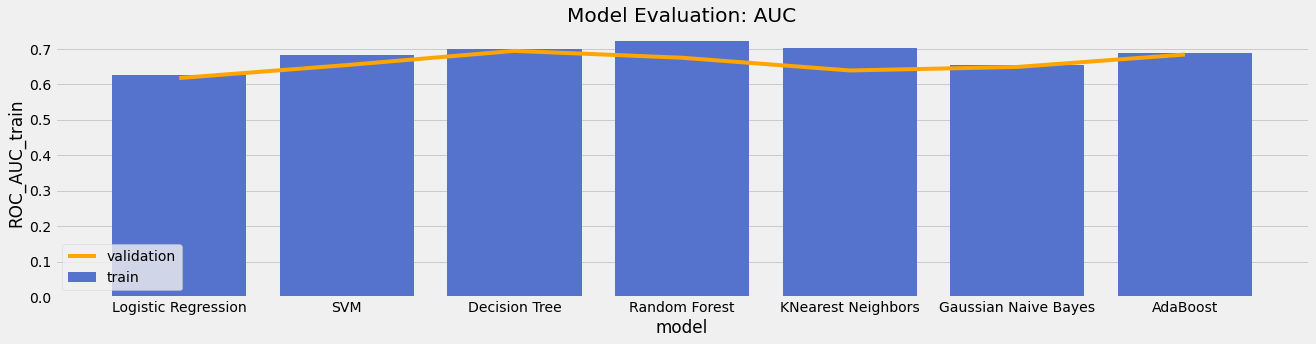

In [155]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["ROC_AUC_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["ROC_AUC_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: AUC")
plt.tight_layout()
plt.savefig('fig/model/auc.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Overall model AUC falls within range ~0.6 - ~0.7.
- SVM has the greatest score of AUC and the val and train set does not really different, the val score does not falls that much compared to the train performance.

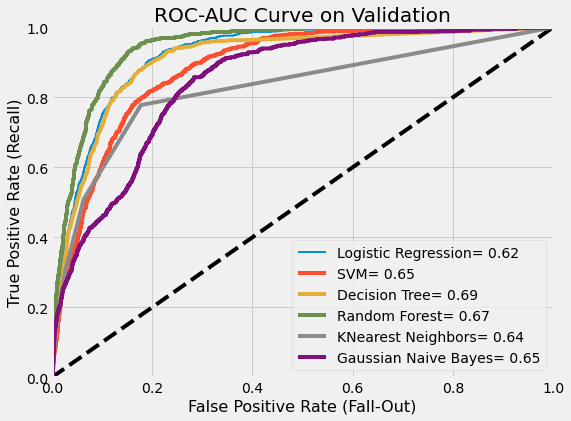

In [156]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_val[0], tpr_val[0], label=models_name[0] + "= " + str(round(roc_auc_val[0],2)))
plt.plot(fpr_val[1], tpr_val[1], label=models_name[1] + "= " + str(round(roc_auc_val[1],2)))
plt.plot(fpr_val[2], tpr_val[2], label=models_name[2] + "= " + str(round(roc_auc_val[2],2)))
plt.plot(fpr_val[3], tpr_val[3], label=models_name[3] + "= " + str(round(roc_auc_val[3],2)))
plt.plot(fpr_val[4], tpr_val[4], label=models_name[4] + "= " + str(round(roc_auc_val[4],2)))
plt.plot(fpr_val[5], tpr_val[5], label=models_name[5] + "= " + str(round(roc_auc_val[5],2)))
plt.title("ROC-AUC Curve on Validation")
plt.legend()
plt.show()

### F1 Score

In [157]:
df_results.sort_values(['F1_val', 'F1_train'], ascending=False)[['F1_val', 'F1_train']]

,F1_val,F1_train
model,,
Decision Tree,0.500319,0.509996
AdaBoost,0.489037,0.494892
Random Forest,0.484806,0.587515
SVM,0.418605,0.480780
KNearest Neighbors,0.402560,0.539921
Gaussian Naive Bayes,0.402516,0.408956
Logistic Regression,0.366798,0.383489


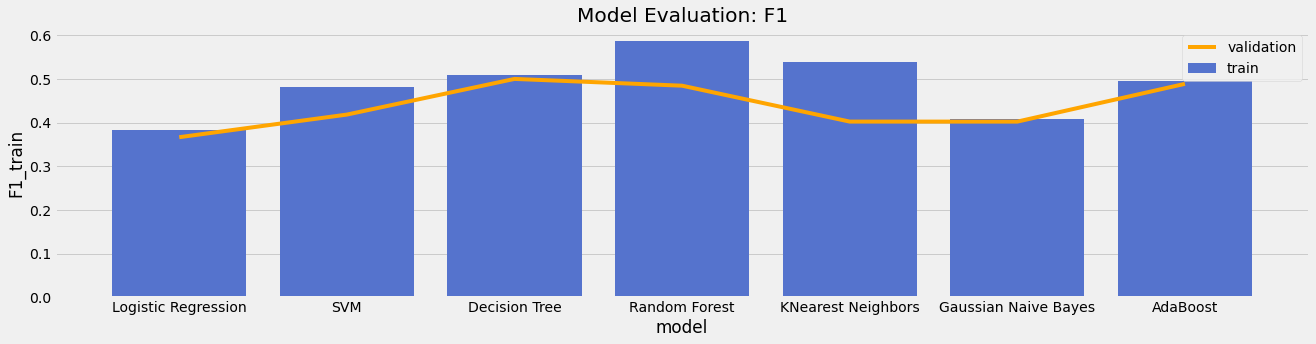

In [158]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["F1_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["F1_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: F1")
plt.tight_layout()
plt.savefig('fig/model/f1.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Overall model F1 falls within the range ~0.4 - ~0.6.
- Random Forest has the greatest score of the AUC train but a quite different score on the val.
- Logistic Regression and Gaussian Naive Bayes val and train score look consistent.

### Precision

In [159]:
df_results.sort_values(['Precision_val', 'Precision_train'], ascending=False)[['Precision_val', 'Precision_train']]

,Precision_val,Precision_train
model,,
Random Forest,0.704312,0.819735
Logistic Regression,0.688427,0.686804
AdaBoost,0.637782,0.641806
Decision Tree,0.613459,0.622449
KNearest Neighbors,0.592050,0.753863
SVM,0.522581,0.614868
Gaussian Naive Bayes,0.483384,0.473471


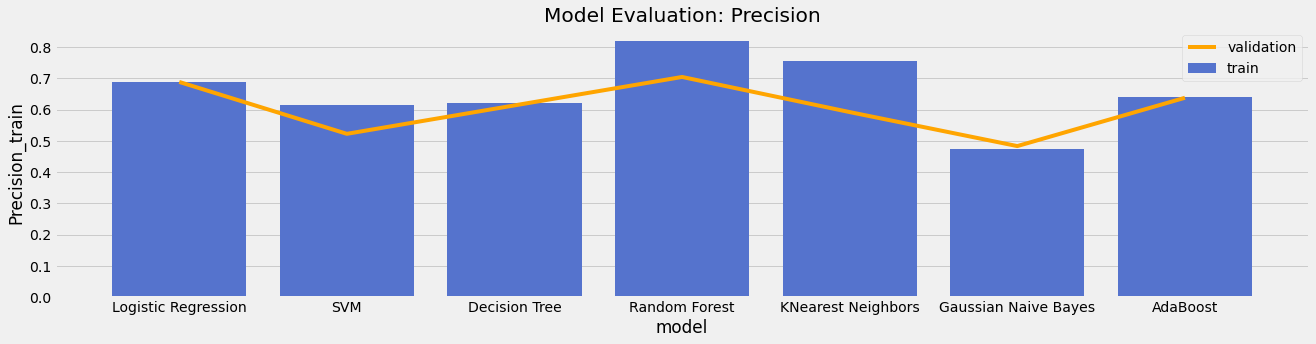

In [160]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Precision_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Precision_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Precision")
plt.tight_layout()
plt.savefig('fig/model/precision.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Overall model precision falls within the range ~0.5 - ~0.8.
- Logistic Regression has the most consistent score on val and train set.

### Recall

In [161]:
df_results.sort_values(['Recall_val', 'Recall_train'], ascending=False)[['Recall_val', 'Recall_train']]

,Recall_val,Recall_train
model,,
Decision Tree,0.422414,0.431958
AdaBoost,0.396552,0.402709
Random Forest,0.369612,0.457820
SVM,0.349138,0.394704
Gaussian Naive Bayes,0.344828,0.359914
KNearest Neighbors,0.304957,0.420567
Logistic Regression,0.250000,0.266010


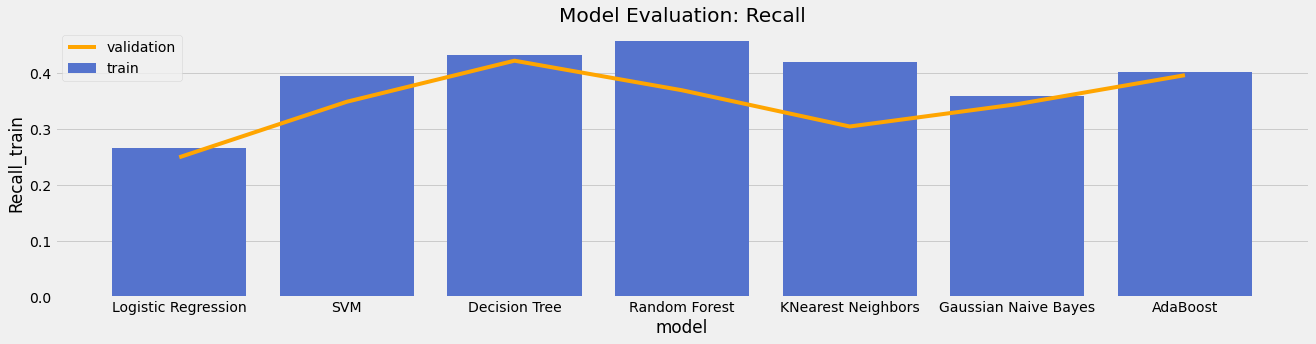

In [162]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Recall_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Recall_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Recall")
plt.tight_layout()
plt.savefig('fig/model/recall.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- Overall model Recall falls within the range ~0.3 - ~0.6.
- SVM has the highest score of Recall, it means this model can capture more actual class 1.

### Time Elapsed

In [163]:
df_results.sort_values(['Time_Elapsed'], ascending=False)[['Time_Elapsed']]

,Time_Elapsed
model,
KNearest Neighbors,14684.43
SVM,10257.05
Random Forest,302.39
AdaBoost,121.95
Gaussian Naive Bayes,9.40
Decision Tree,4.00
Logistic Regression,2.06


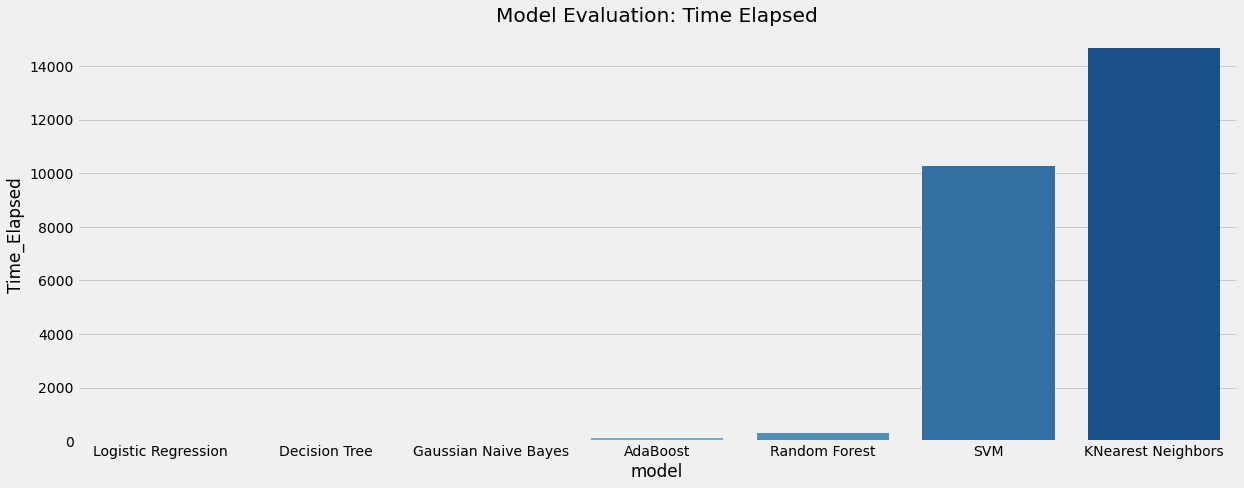

In [164]:
plt.figure(figsize = (17.5, 7))
sns.barplot(
    x = df_results.index, y = df_results["Time_Elapsed"],
    order = df_results["Time_Elapsed"].sort_values(ascending = True).index,
    palette = "Blues"
)
plt.title("Model Evaluation: Time Elapsed")
plt.tight_layout()
plt.savefig('fig/model/time elapsed.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

- The time elapsed that the model spends in predicting values is varied. Logistic Regression is the fastest model, whereas KNN is the slowest model.

### Confusion Matrix

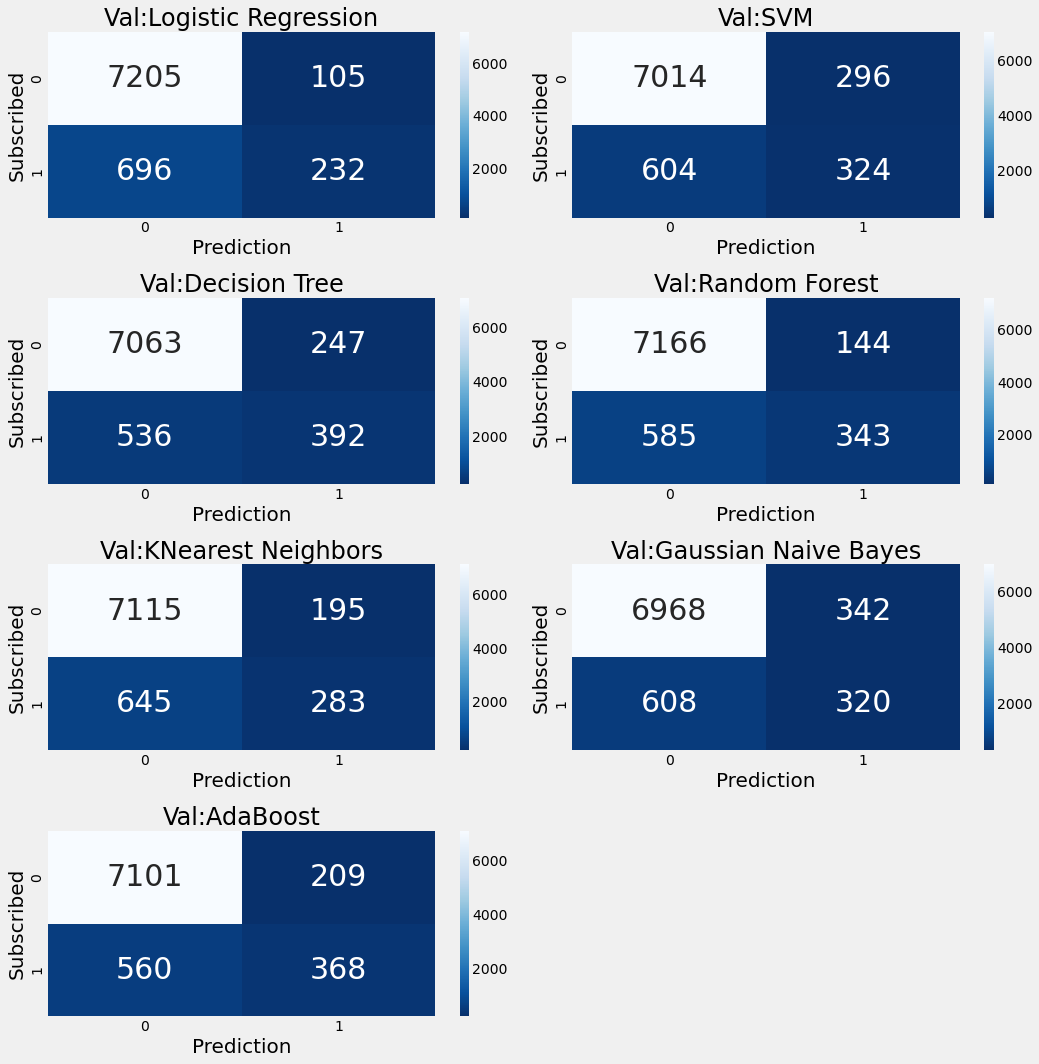

In [165]:
# plot all numerical features
plt.figure(figsize = (15, 15))
for i in range(len(models_name)):
    plt.subplot(len(models_name)//2+1, 2, i + 1)
    sns.heatmap(
        confusion_m_val[i],
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r',
        annot_kws={"fontsize":30}
    )
    plt.xlabel("Prediction", fontsize = 20)
    plt.ylabel("Subscribed", fontsize = 20)
    plt.title("Val:" + str(models_name[i]), fontsize = 24)
plt.tight_layout()
plt.show()

SVM has the greatest number of True Postive.

### Classification Report

In [166]:
for i in range(len(models_name)):
    print(models_name[i])
    print(c_report_val[i])

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.25      0.37       928

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238

SVM
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.52      0.35      0.42       928

    accuracy                           0.89      8238
   macro avg       0.72      0.65      0.68      8238
weighted avg       0.88      0.89      0.88      8238

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.61      0.42      0.50       928

    accuracy                           0.90      8238
   macro avg       0.77      0.69      0.72      8238
weighted avg       0.89      0.90   

We can see that all of the model can capture about 90% of class 0 actual value, but still lacks on class 1.

# Model Saving

In [167]:
best_model = models_dict["SVM"]

In [168]:
joblib.dump(best_model, "model/best_model_svm.pkl")

['model/best_model_svm.pkl']

In [169]:
# test load
joblib.load("model/best_model_svm.pkl")

SVC(gamma='auto', max_iter=2000, probability=True, random_state=42)

In [185]:
best_model_LogReg = models_dict["Logistic Regression"]

In [186]:
joblib.dump(best_model_LogReg, "model/best_model_LR.pkl")

['model/best_model_LR.pkl']

In [187]:
# test load
joblib.load("model/best_model_LR.pkl")

LogisticRegression(C=0.001, random_state=42)

# Model Inference

## New Data

The new data that we will need to predict our models based on the feature that we previosuly had selected are:
- Bank Client Data: age, job, marital, education, default, housing, loan, contact, month, day_of_week, and duration.
- Other Attributes: campaign, previous, poutcome
- Social and Economic Context: emp_var_rate.

Those data should be ordered as:
age, education, duration, campaign, previous, emp_var_rate, job, marital, default, housing, loan, contact, poutcome, month, and day_of_week in the predict function.

Of course, in should followed the pre-processing stage thas was performed during the preprocessing stage.

In [170]:
print(X.shape)
X.head(3)

(41188, 33)


,age,education,duration,campaign,previous,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,56,1,261,1,0,1.1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
1,57,4,149,1,0,1.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
2,37,4,226,1,0,1.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0.5,-0.866025,0.0,1.0


In [171]:
predict_this = [[20, 6, 400, 20, 0, -1.1, 0, 0, 0, 0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.5,-0.866025,0.0,1.0]]

In [172]:
predict_val = scaling_pipeline.transform(predict_this)

In [173]:
if best_model.predict(predict_val) == 1:
    print("This person will more likely subscribe to the term deposit.")
else:
    print("This person will not likely to subscribe to the term deposit.")

This person will not likely to subscribe to the term deposit.


## Test Set

### SVM

In [174]:
# predict y_test
svm_pred = best_model.predict(X_test_trf)

In [175]:
prediction_svm = pd.DataFrame({
    "Fact": y_test,
    "Prediction": svm_pred
})
prediction_svm

,Fact,Prediction
35050,0,0
38935,1,0
32033,0,0
29228,1,1
38905,0,1
...,...,...
235,0,0
5343,0,0
28624,1,0
36439,1,0


In [176]:
prediction_svm.groupby(["Fact"]).count().rename(columns={"Prediction":"Count"}).T

Fact,0,1
Count,3655,464


In [177]:
prediction_svm.groupby(["Prediction"]).count().rename(columns={"fact":"Count"}).T

Prediction,0,1
Fact,3821,298


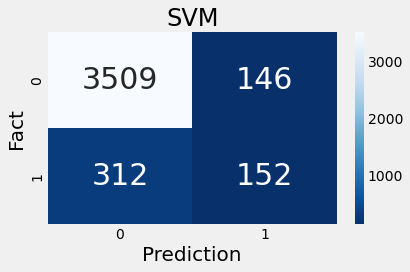

In [178]:
sns.heatmap(
    confusion_matrix(y_test, svm_pred),
    annot = True,
    fmt = '.0f',
    cmap = 'Blues_r',
    annot_kws={"fontsize":30}
)
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Fact", fontsize = 20)
plt.title(str(models_name[1]), fontsize = 24)
plt.tight_layout()
plt.show()

SVM on test set still have a lot of FP and FN, almost the same size of the TP.

In [179]:
scores_test_svm = best_model.predict_proba(X_test_trf)

In [180]:
fpr, tpr, threshold = roc_curve(y_test, scores_test_svm[:, 1])

In [181]:
roc_auc_test = roc_auc_score(y_test, svm_pred)

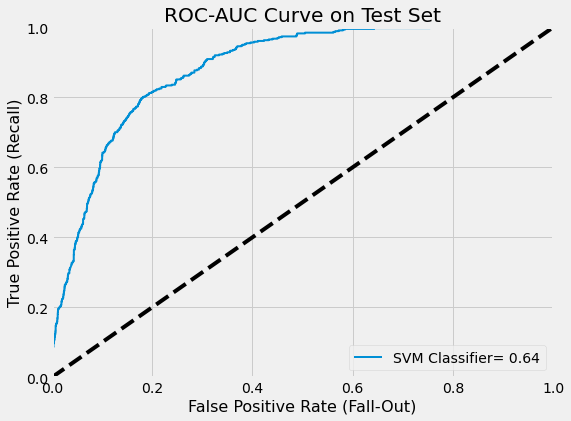

In [182]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr, label="SVM Classifier= " + str(round(roc_auc_test,2)))
plt.title("ROC-AUC Curve on Test Set")
plt.legend()
plt.show()

The AUC on test set is slightly better on the validation set. But haven't achieve the training set which is about 76%.

In [183]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3655
           1       0.51      0.33      0.40       464

    accuracy                           0.89      4119
   macro avg       0.71      0.64      0.67      4119
weighted avg       0.87      0.89      0.88      4119



### Logistic Regression

In [189]:
# predict y_test
lr_pred = best_model_LogReg.predict(X_test_trf)

In [190]:
prediction_lr = pd.DataFrame({
    "Fact": y_test,
    "Prediction": svm_pred
})
prediction_lr

,Fact,Prediction
35050,0,0
38935,1,0
32033,0,0
29228,1,0
38905,0,1
...,...,...
235,0,0
5343,0,0
28624,1,0
36439,1,0


In [191]:
prediction_lr.groupby(["Fact"]).count().rename(columns={"Prediction":"Count"}).T

Fact,0,1
Count,3655,464


In [192]:
prediction_lr.groupby(['Prediction']).count().rename(columns={'Fact':'Count'}).T

Prediction,0,1
Count,3930,189


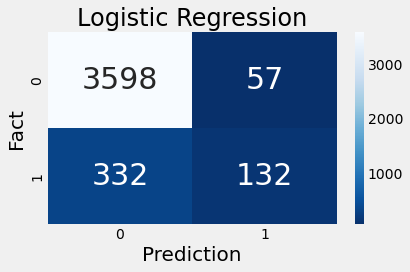

In [194]:
sns.heatmap(
    confusion_matrix(y_test, lr_pred),
    annot = True,
    fmt = '.0f',
    cmap = 'Blues_r',
    annot_kws={"fontsize":30}
)
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Fact", fontsize = 20)
plt.title(str(models_name[0]), fontsize = 24)
plt.tight_layout()
plt.show()

In [195]:
scores_test_lr = best_model_LogReg.predict_proba(X_test_trf)

In [196]:
fpr, tpr, threshold = roc_curve(y_test, scores_test_lr[:, 1])

In [197]:
roc_auc_test = roc_auc_score(y_test, lr_pred)

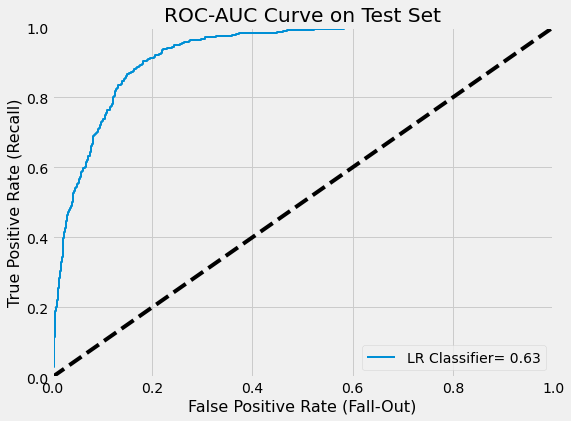

In [198]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr, label="LR Classifier= " + str(round(roc_auc_test,2)))
plt.title("ROC-AUC Curve on Test Set")
plt.legend()
plt.show()

In [199]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3655
           1       0.70      0.28      0.40       464

    accuracy                           0.91      4119
   macro avg       0.81      0.63      0.68      4119
weighted avg       0.89      0.91      0.89      4119



**Solutions for the Next Marketing Campaign (Conclusion):**

1) Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.


7) Develop a Questionaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.